In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import os

### We read the DataFrames created in the notebook 'DataFrame Creation'

In [2]:
concat_df = pd.read_pickle('all_stats.pkl')
statsFastS = pd.read_pickle('statsFastSurfer.pkl')
statsFreeS = pd.read_pickle('statsFreeSurfer.pkl')

In [3]:
concat_df.head()

3rd-Ventricle  4th-Ventricle  5th-Ventricle  Brain-Stem  \
subject Software                                                              
10010   FastSurfer         1252.3         1545.0            0.0     23478.7   
        FreeSurfer         1159.4         1573.8            0.0     23742.3   
10011   FastSurfer         1395.7         1464.9            0.0     20967.4   
        FreeSurfer         1275.4         1295.1            0.0     19752.6   
10012   FastSurfer         1373.6         1385.9            0.0     21221.4   

                     BrainSegVol  BrainSegVolNotVent  BrainSegVolNotVentSurf  \
subject Software                                                               
10010   FastSurfer  1.130872e+06        1.103652e+06            1.103846e+06   
        FreeSurfer  1.120108e+06        1.094086e+06            1.279596e+06   
10011   FastSurfer  1.013429e+06        9.930320e+05            9.933133e+05   
        FreeSurfer  9.905536e+05        9.711305e+05            1.121663e+06   
10012   FastSurfer  1.074364e+06        1.042517e+06            1.042115e+06   

                    CC_Anterior  CC_Central  CC_Mid_Anterior  ...  \
subject Software                                              ...   
10010   FastSurfer       1159.2       914.5            541.8  ...   
        FreeSurfer        725.7       372.8            400.9  ...   
10011   FastSurfer        703.7       339.2            350.5  ...   
        FreeSurfer        518.1       258.3            268.4  ...   
10012   FastSurfer        981.2       712.4            388.5  ...   

                    SupraTentorialVol  SupraTentorialVolNotVent  \
subject Software                                                  
10010   FastSurfer      985329.127032             962081.127032   
        FreeSurfer      404450.375411             382244.984786   
10011   FastSurfer      895651.319629             879223.319629   
        FreeSurfer      363215.767095             347508.095220   
10012   FastSurfer      958722.844341             930585.844341   

                    SupraTentorialVolNotVentVox   TotalGrayVol  \
subject Software                                                 
10010   FastSurfer                     960743.0  606493.534351   
        FreeSurfer                    2241017.0  361617.995000   
10011   FastSurfer                     877813.0  579274.765061   
        FreeSurfer                    2018412.0  327493.800819   
10012   FastSurfer                     930082.0  584596.562471   

                    WM-hypointensities  lhCerebralWhiteMatterVol  \
subject Software                                                   
10010   FastSurfer              2402.2             235160.339637   
        FreeSurfer              2252.6              74117.660344   
10011   FastSurfer              1071.5             195681.058639   
        FreeSurfer              1176.0              59804.103309   
10012   FastSurfer              1390.8             215145.144558   

                      lhCortexVol  non-WM-hypointensities  \
subject Software                                            
10010   FastSurfer  220400.716587                     0.0   
        FreeSurfer   94304.139146                     0.0   
10011   FastSurfer  218365.416744                     0.0   
        FreeSurfer   91502.673933                     0.0   
10012   FastSurfer  219214.854598                     0.0   

                    rhCerebralWhiteMatterVol    rhCortexVol  
subject Software                                             
10010   FastSurfer             231447.253043  215464.817764  
        FreeSurfer              72663.454442   92369.043355  
10011   FastSurfer             196481.495929  217480.348316  
        FreeSurfer              61892.191092   89935.892511  
10012   FastSurfer             218237.137312  225925.707873  

[5 rows x 59 columns]

In [4]:
#shape
concat_df.shape

(2872, 59)

### Box plots representations to check median, quartiles and outliers in each variable

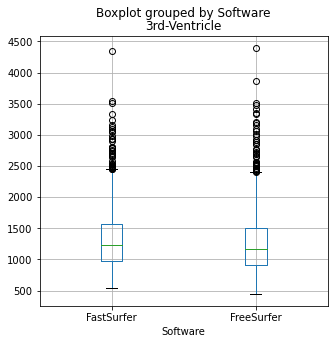

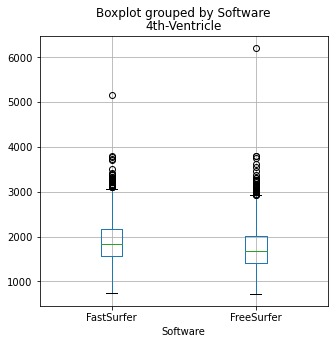

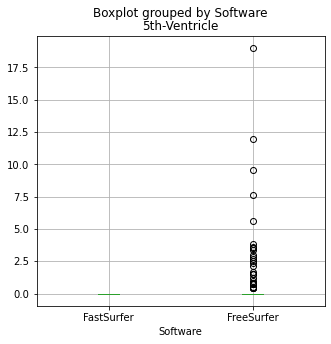

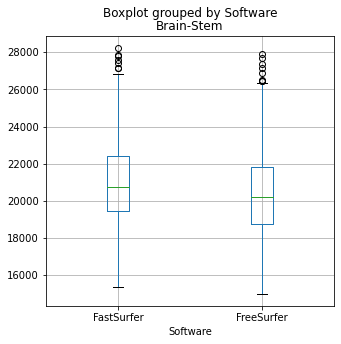

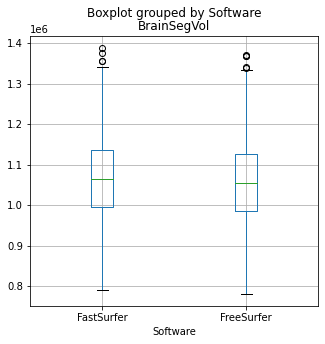

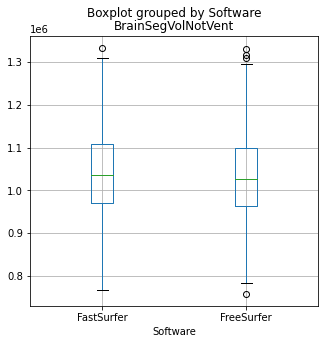

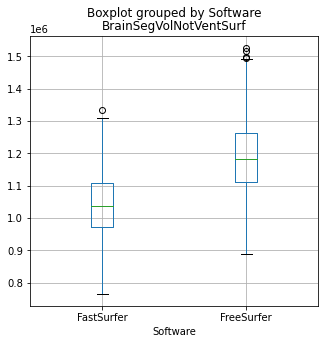

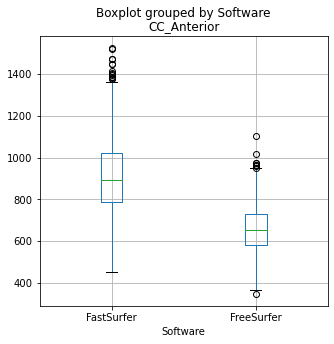

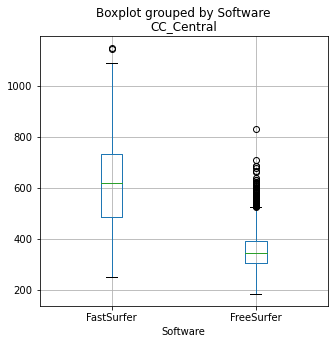

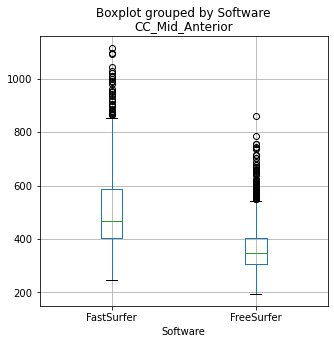

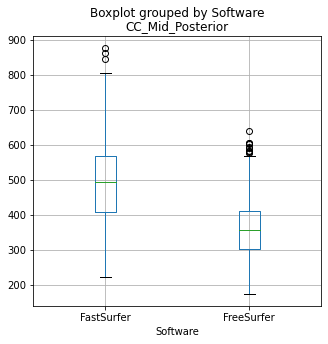

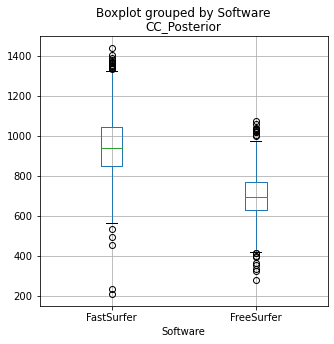

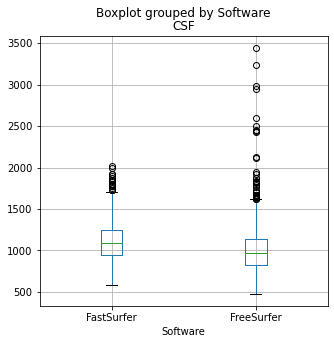

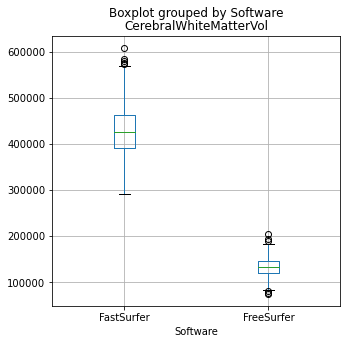

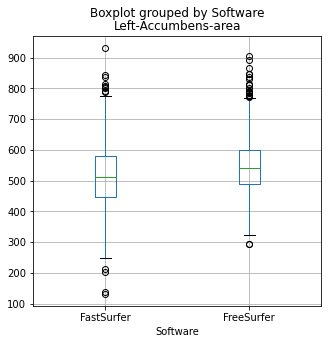

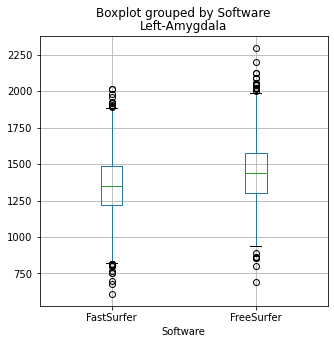

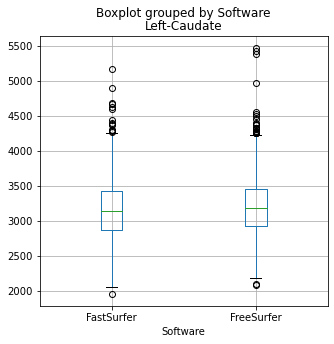

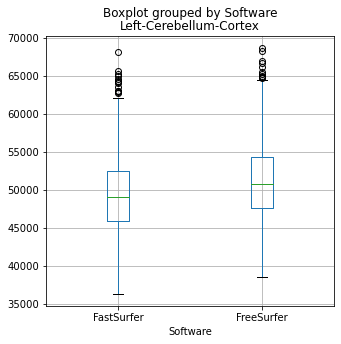

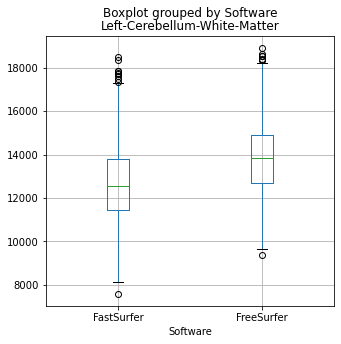

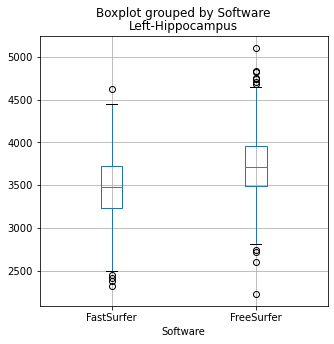

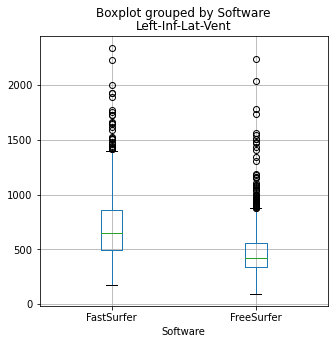

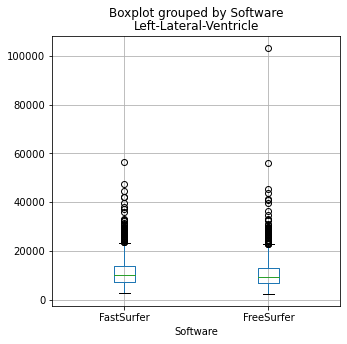

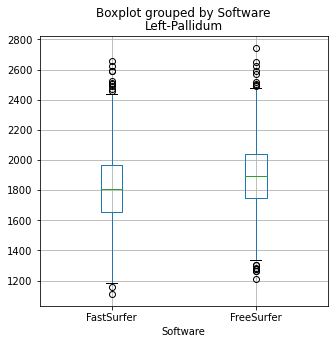

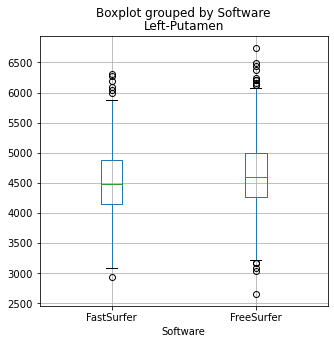

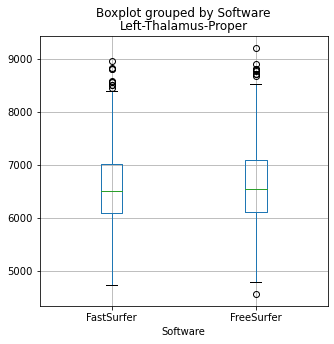

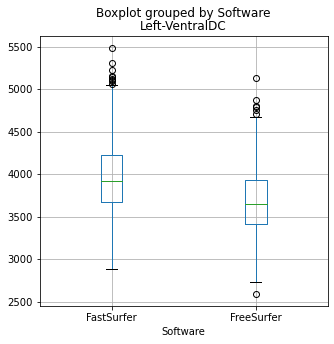

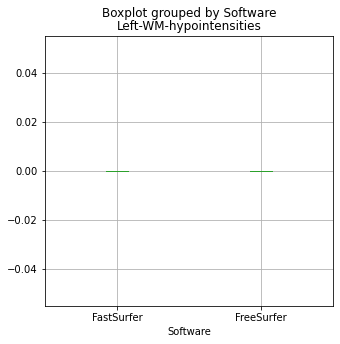

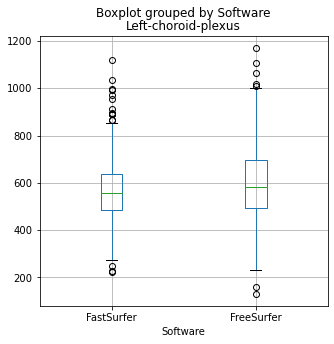

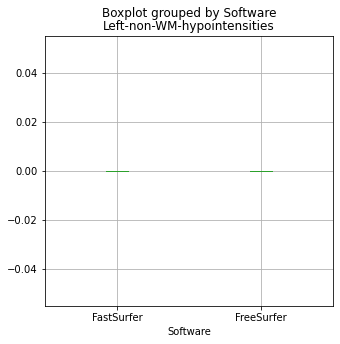

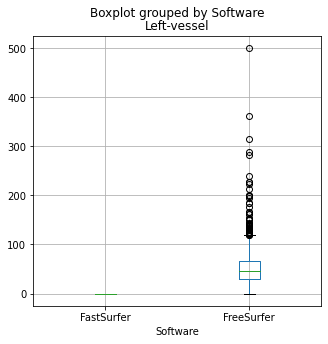

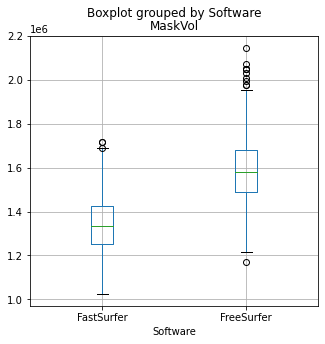

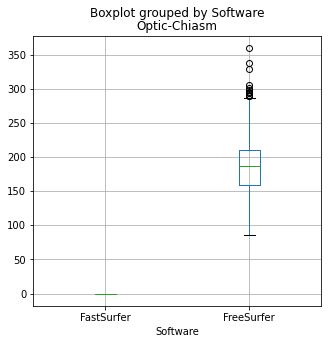

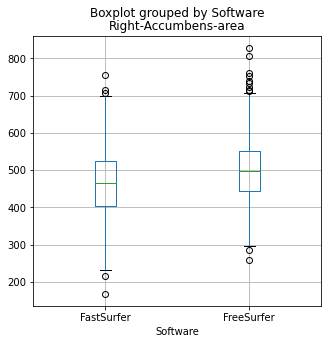

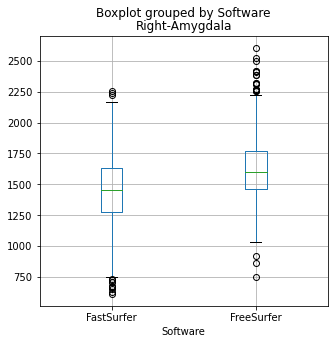

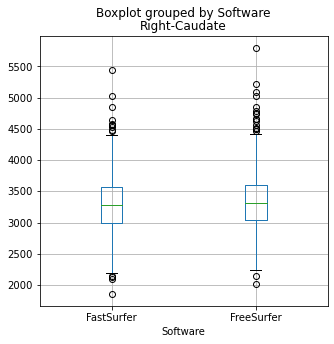

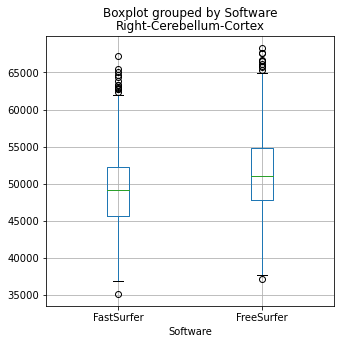

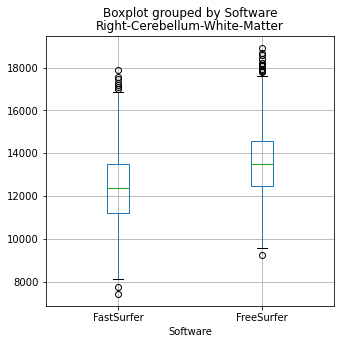

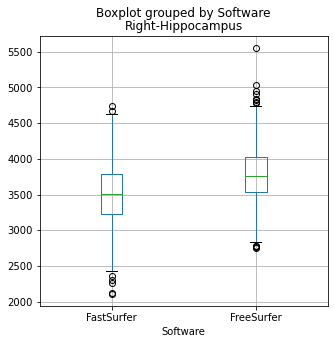

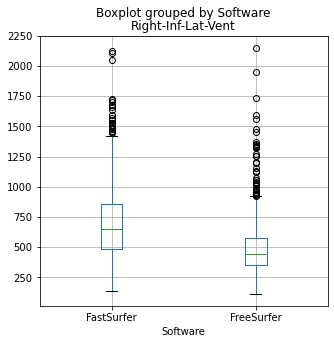

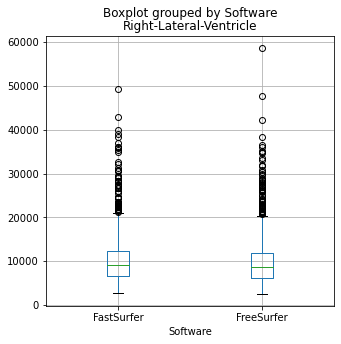

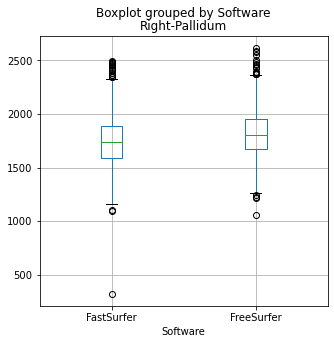

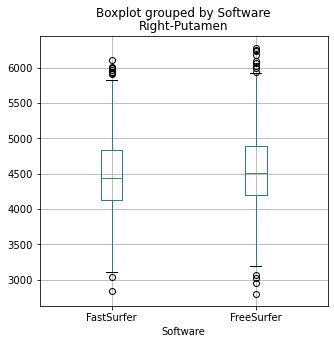

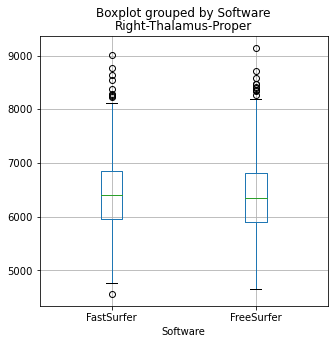

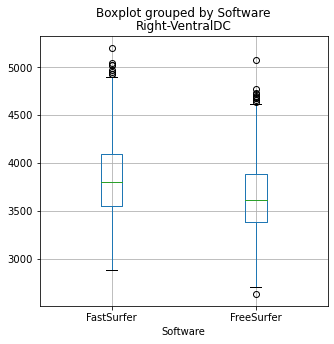

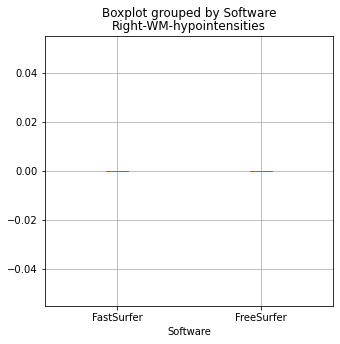

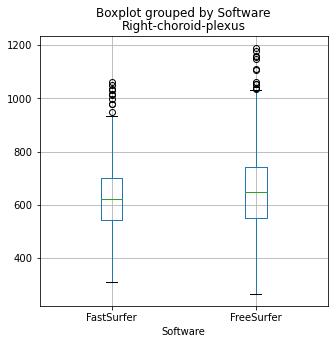

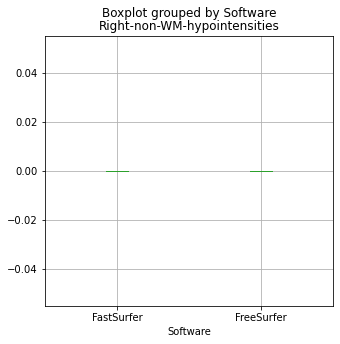

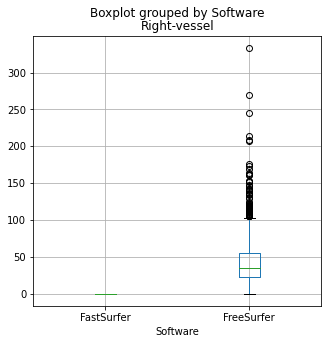

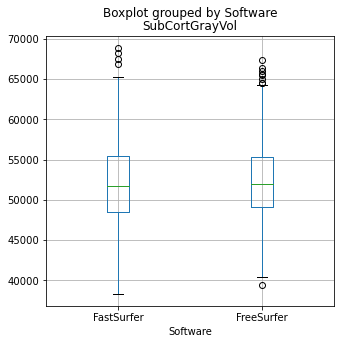

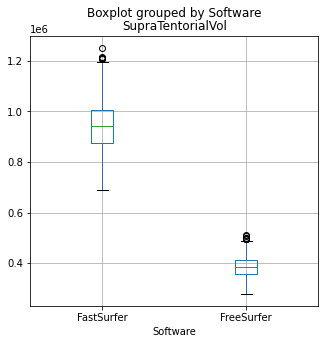

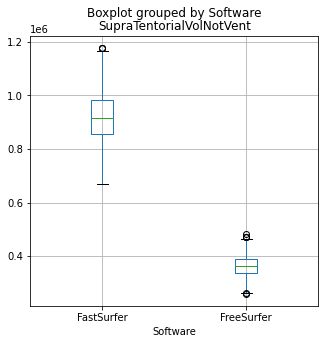

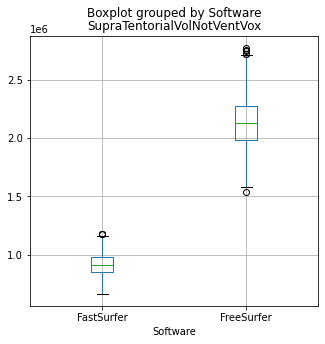

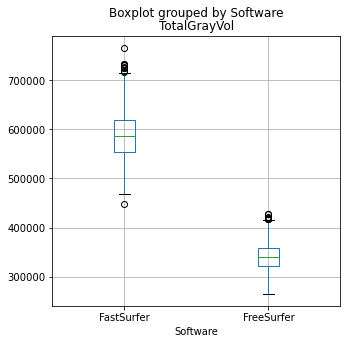

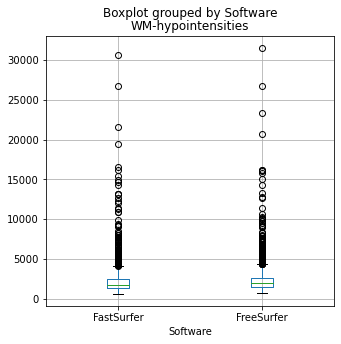

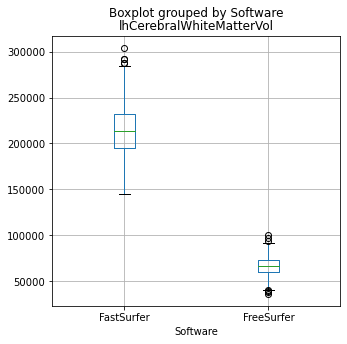

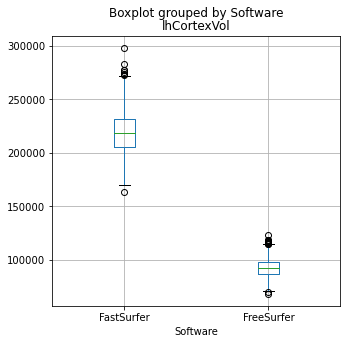

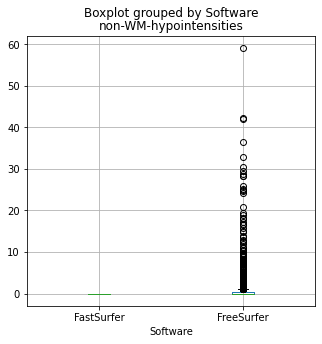

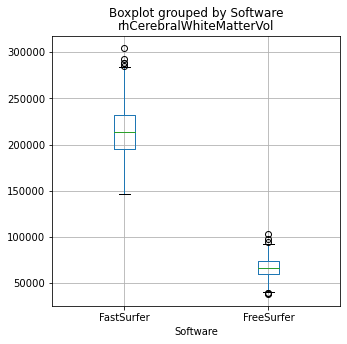

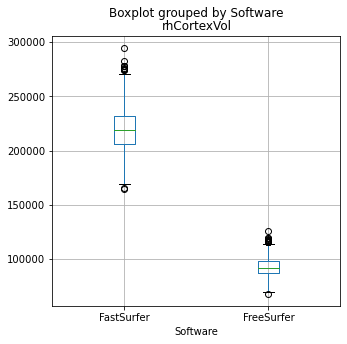

In [5]:
#Boxplots

for i in range(len(concat_df.columns.tolist())):
    concat_df.boxplot(column=concat_df.columns[i],by='Software',figsize=(5,5))
    plt.show()

### Histograms representation to check each variable distribution

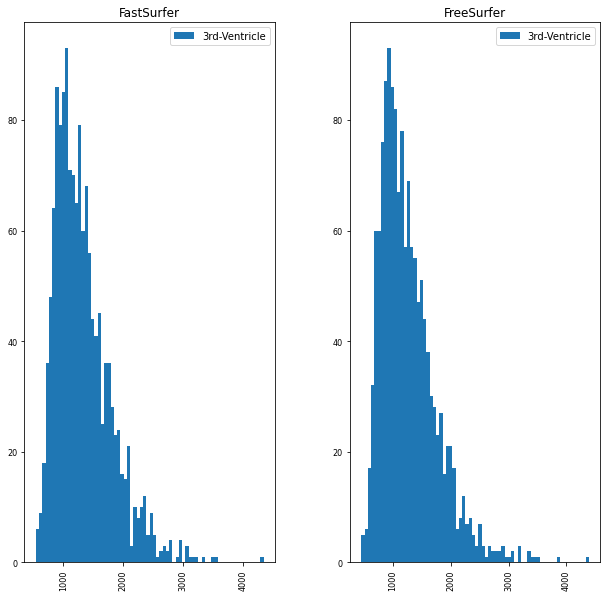

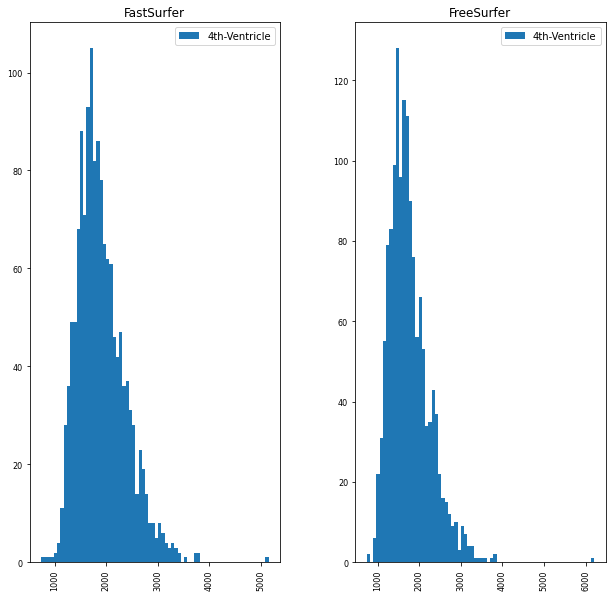

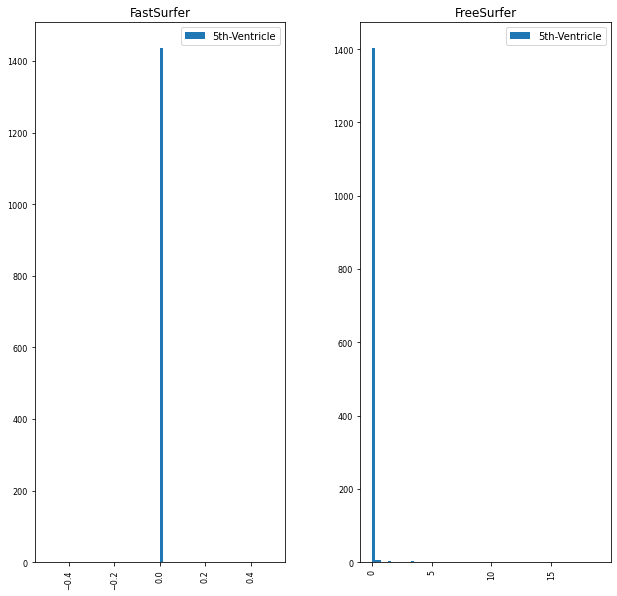

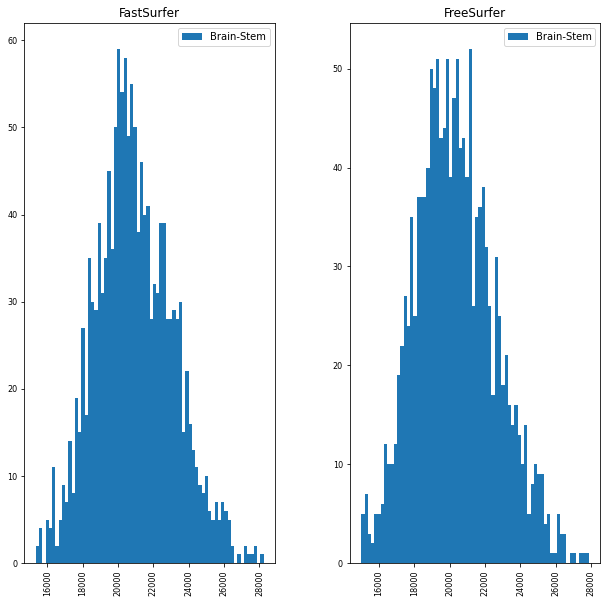

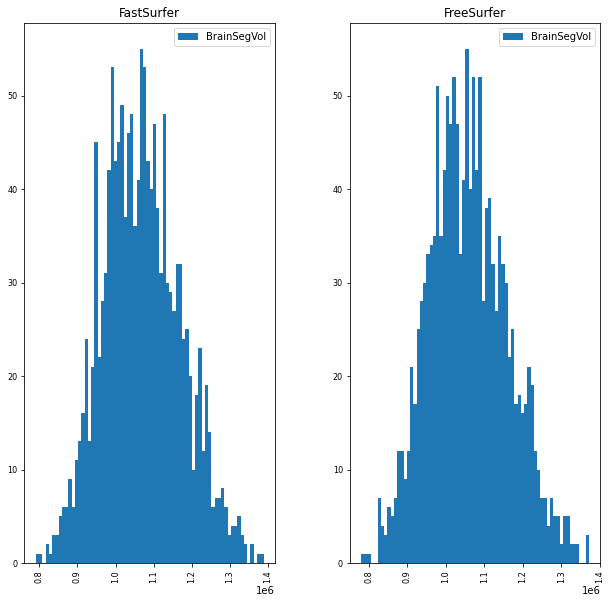

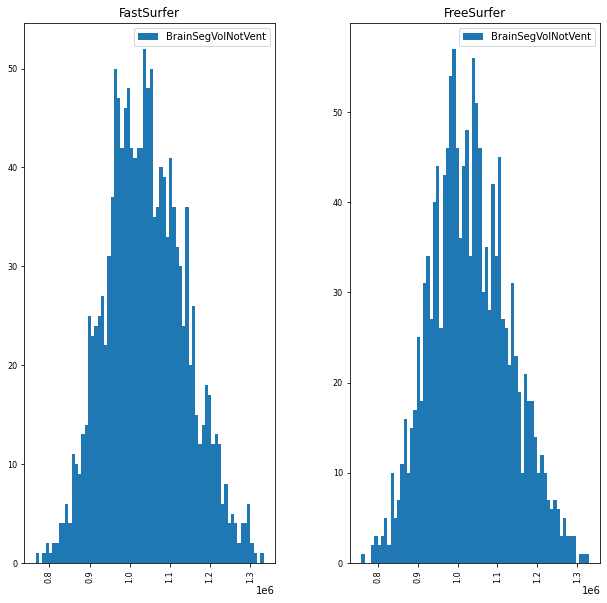

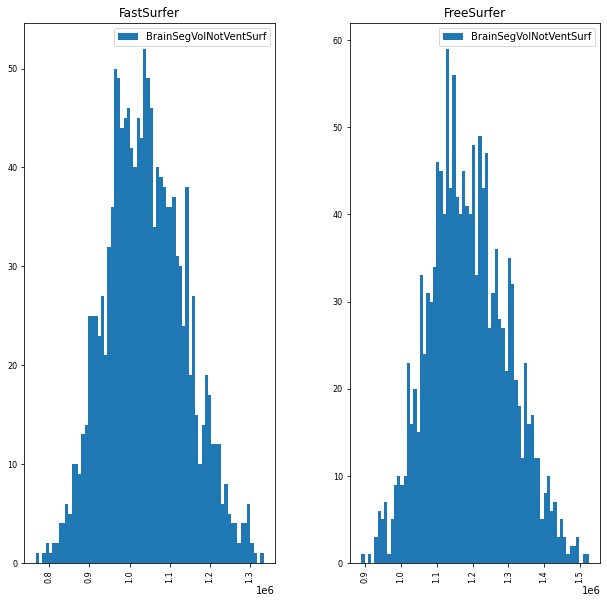

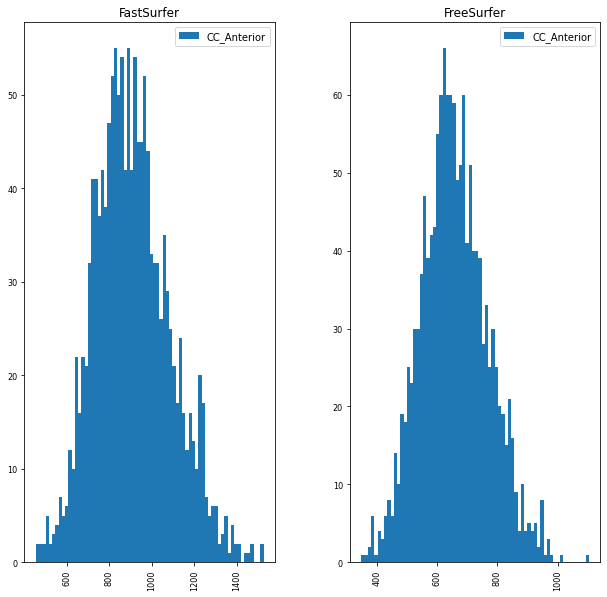

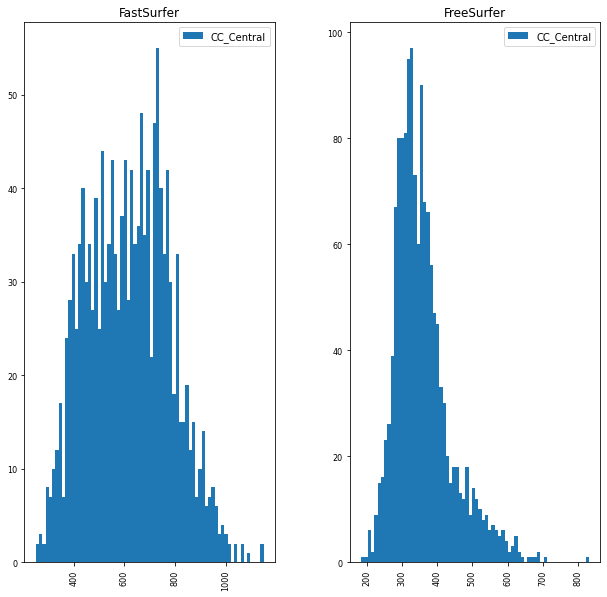

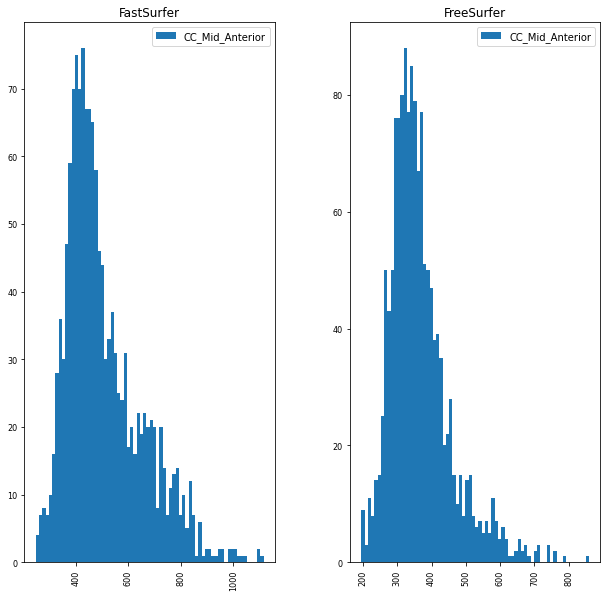

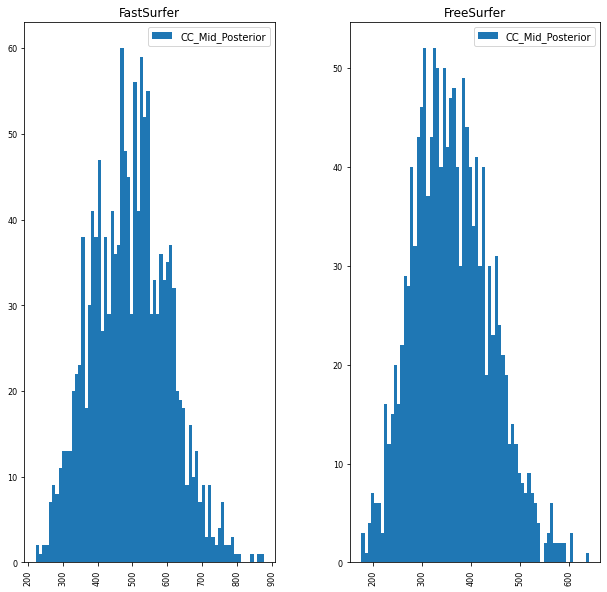

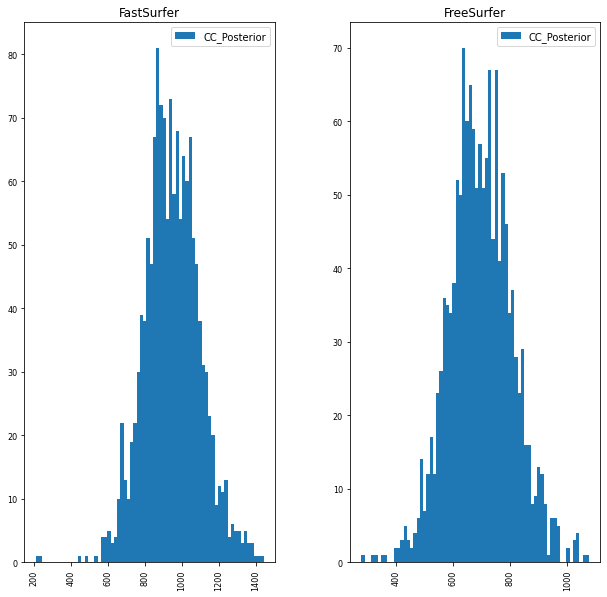

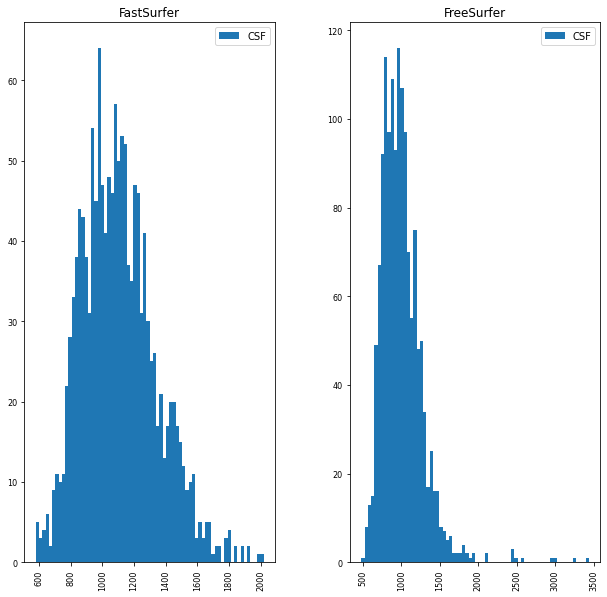

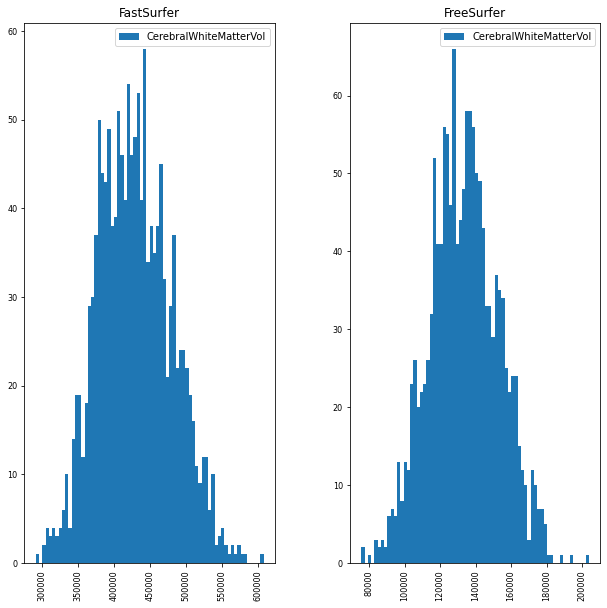

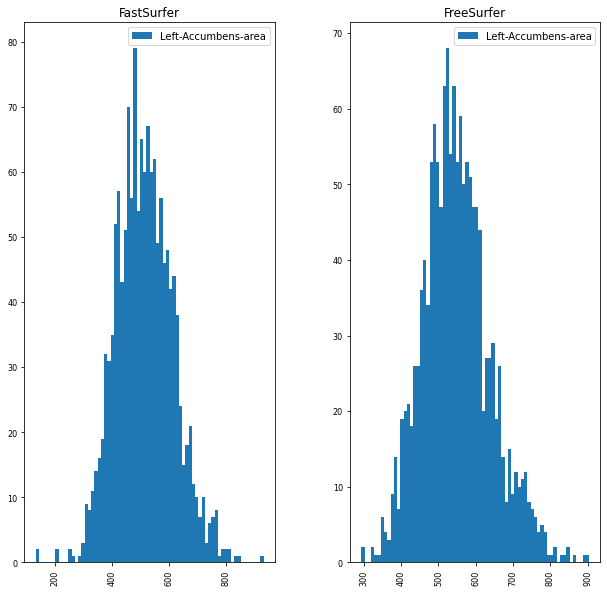

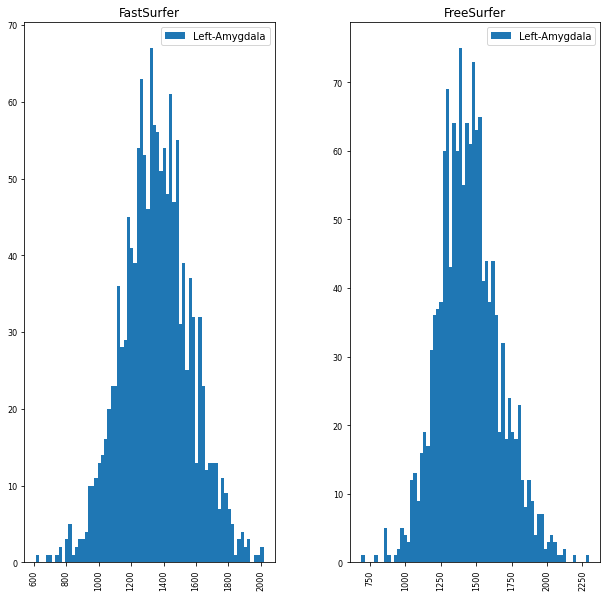

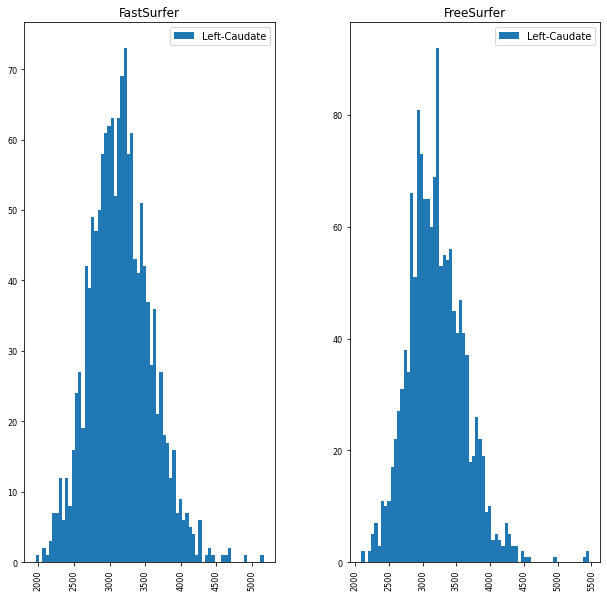

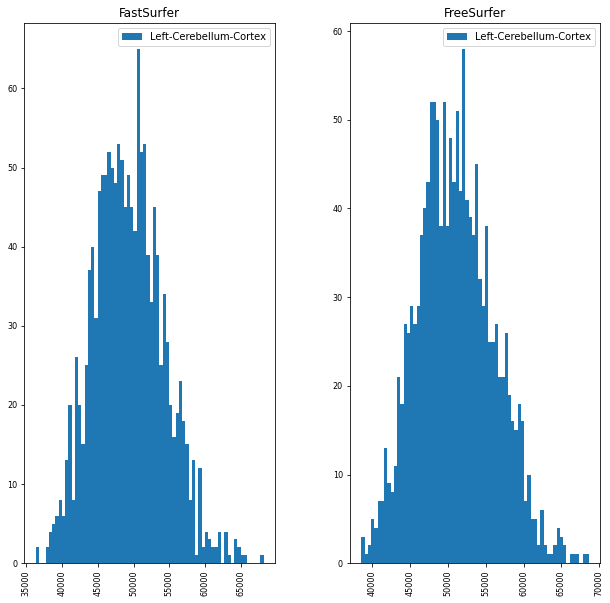

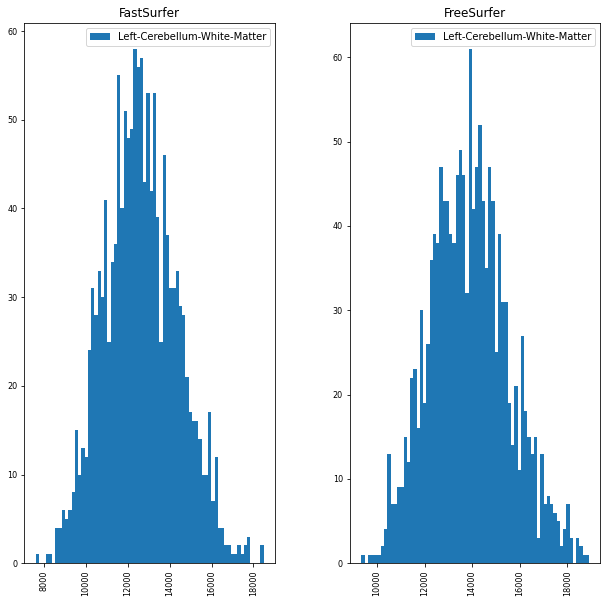

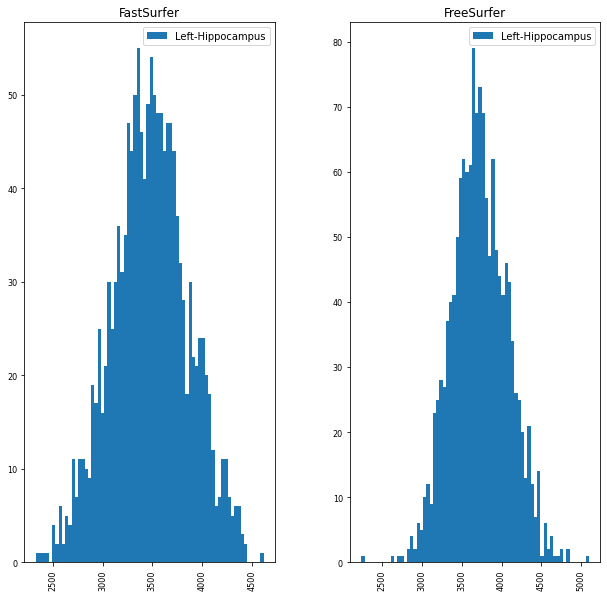

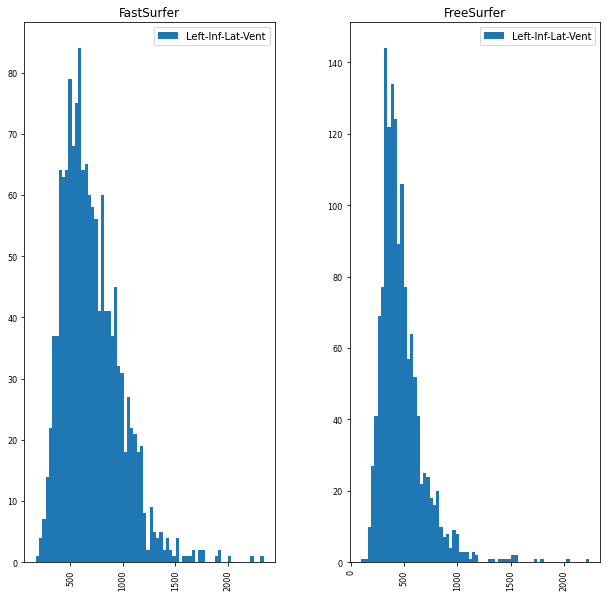

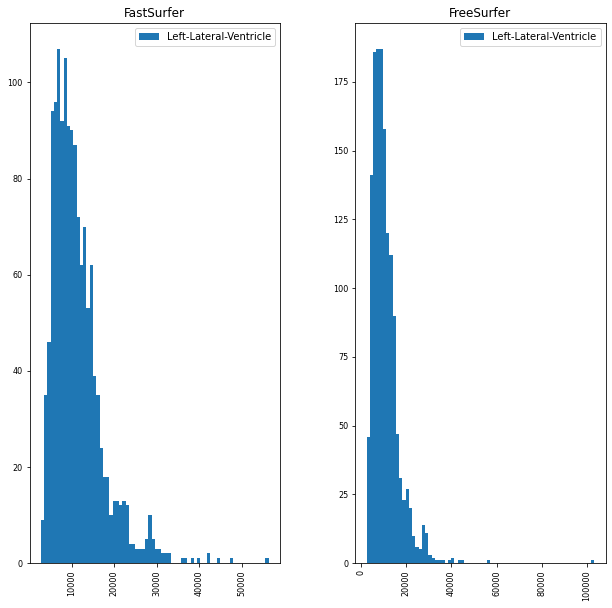

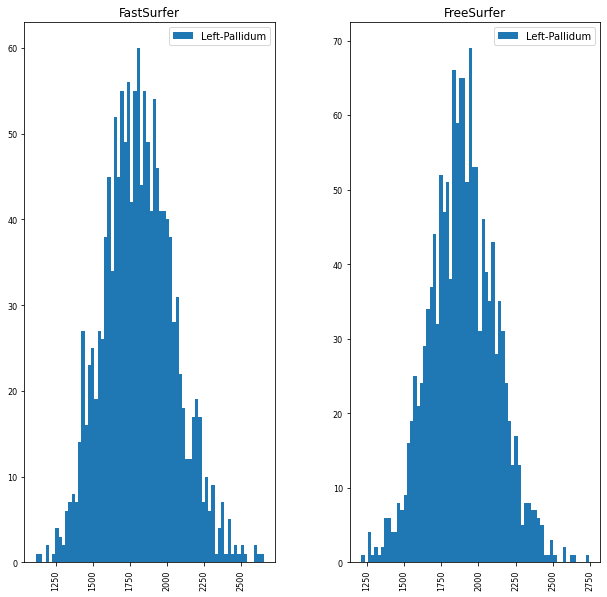

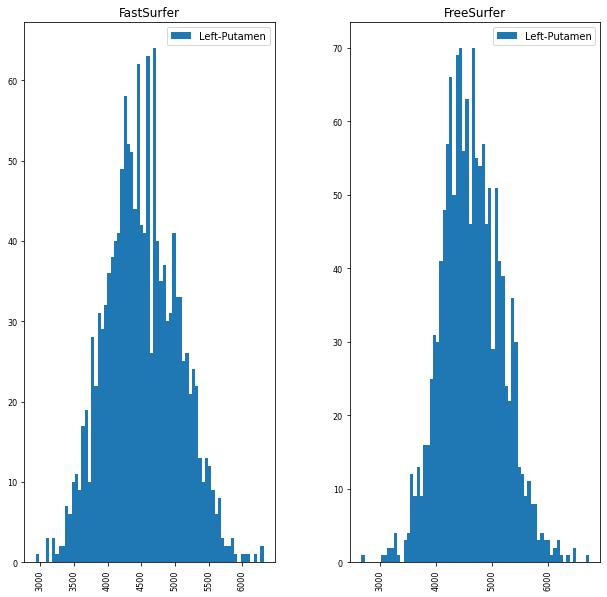

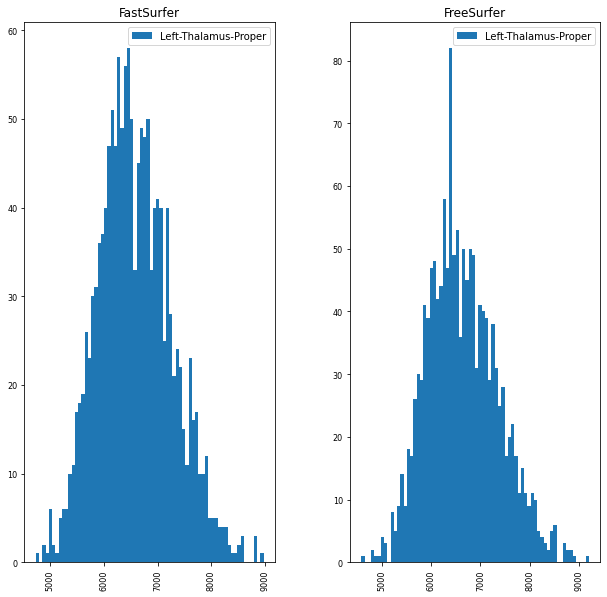

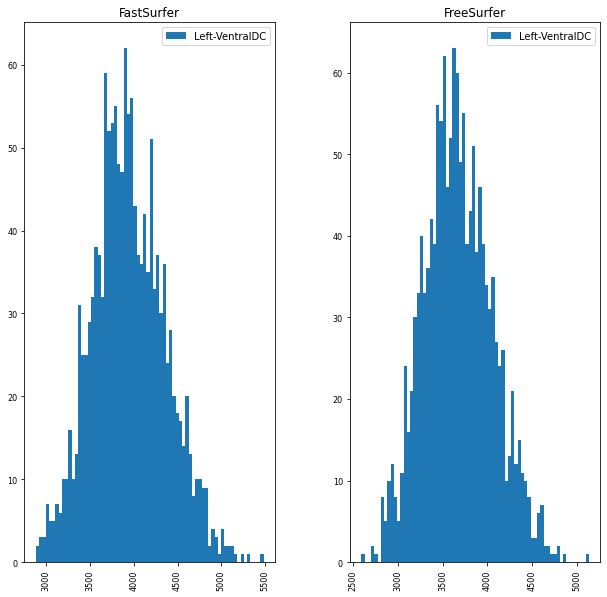

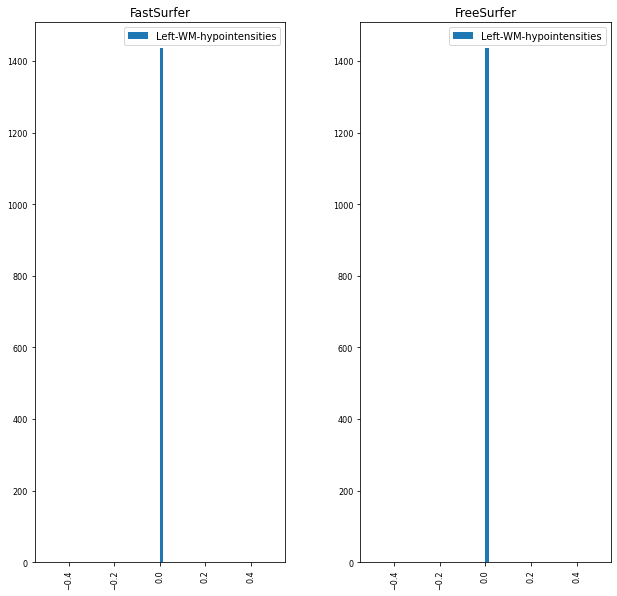

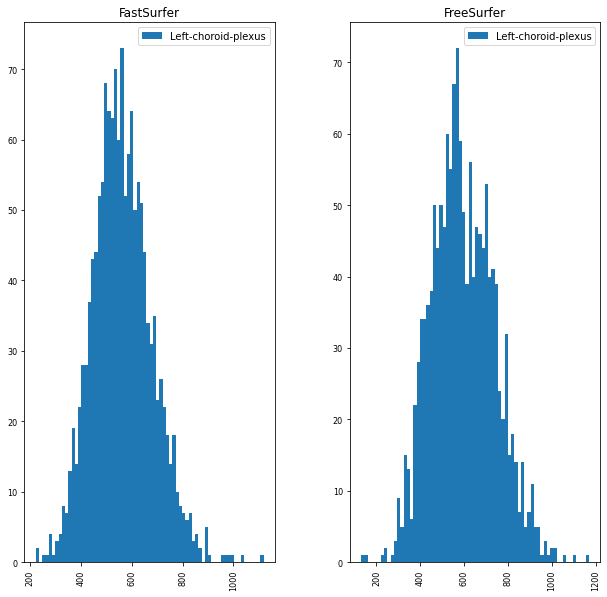

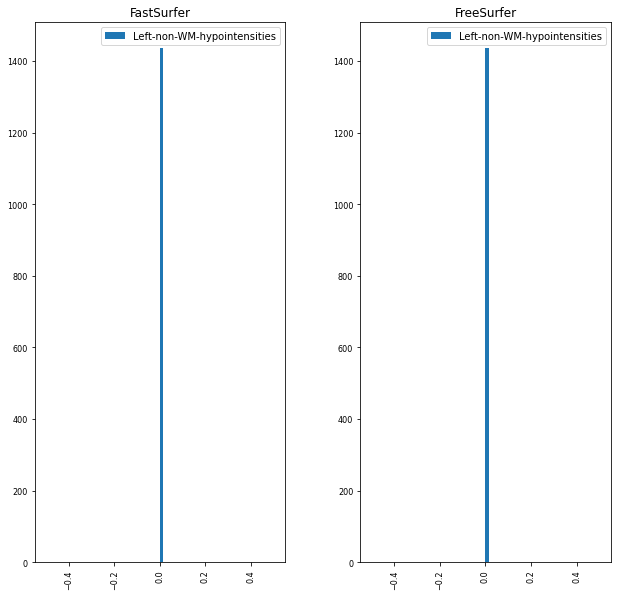

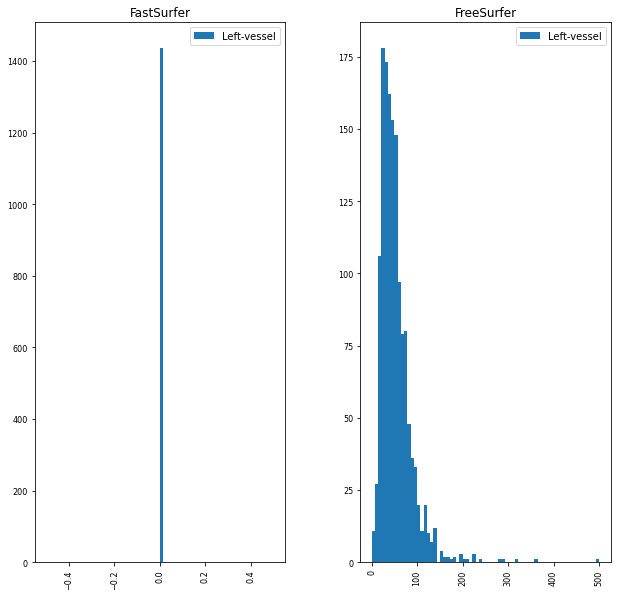

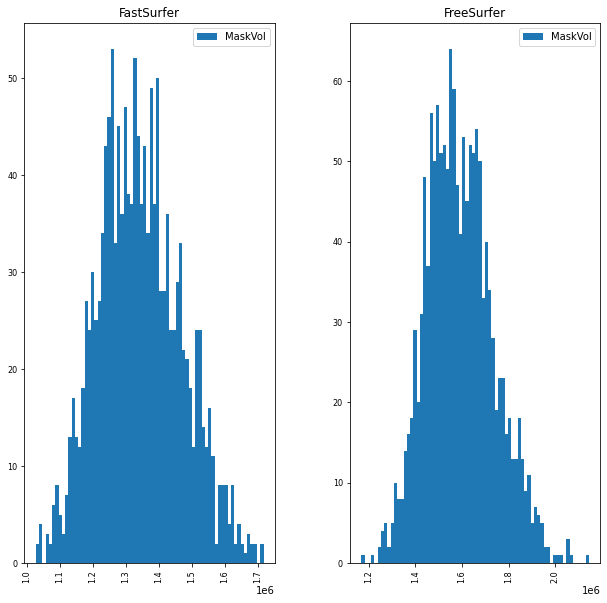

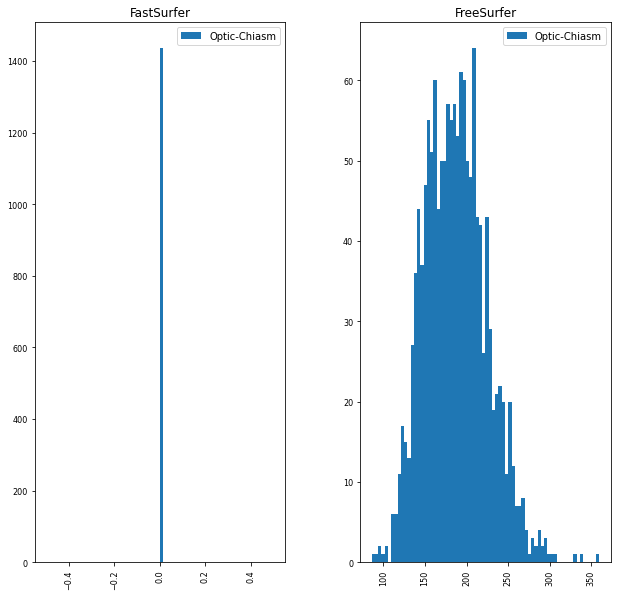

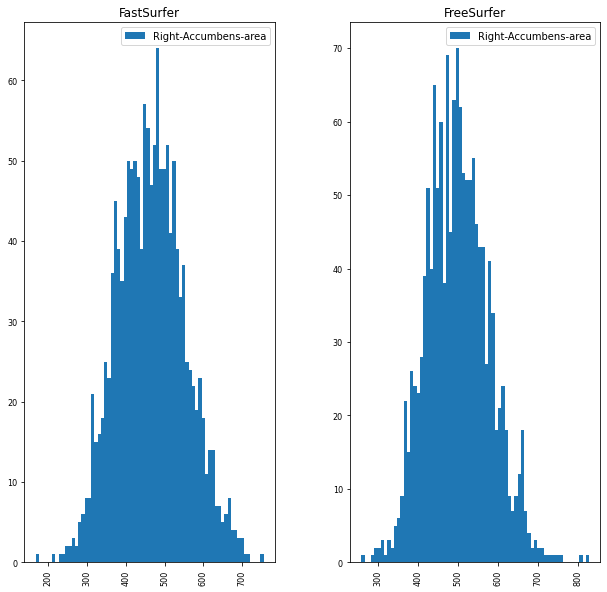

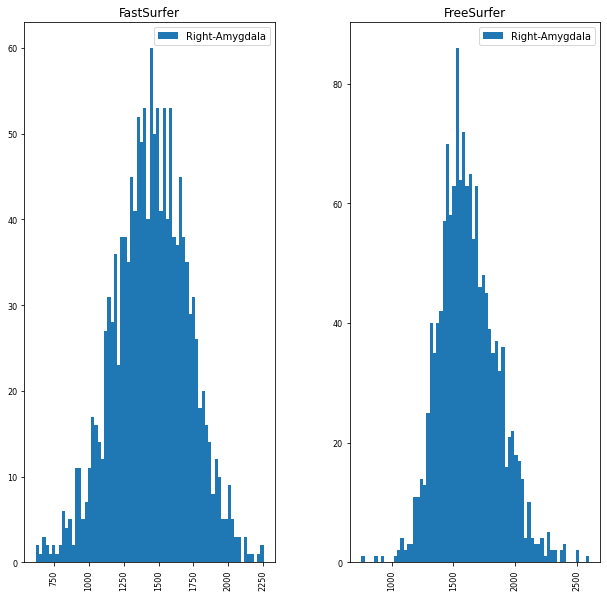

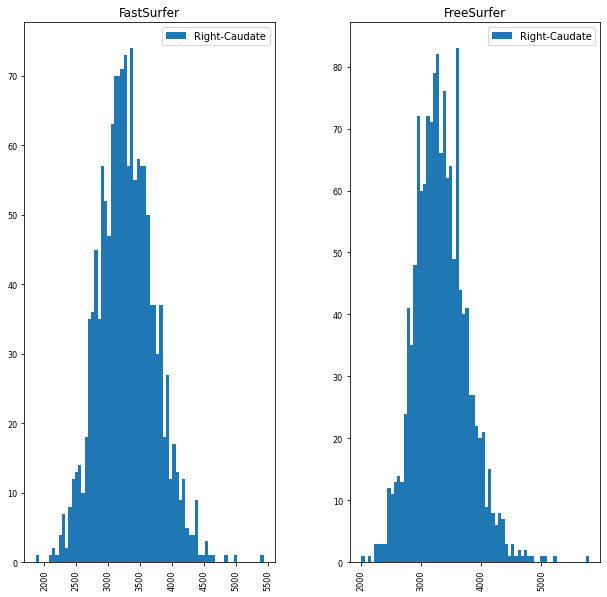

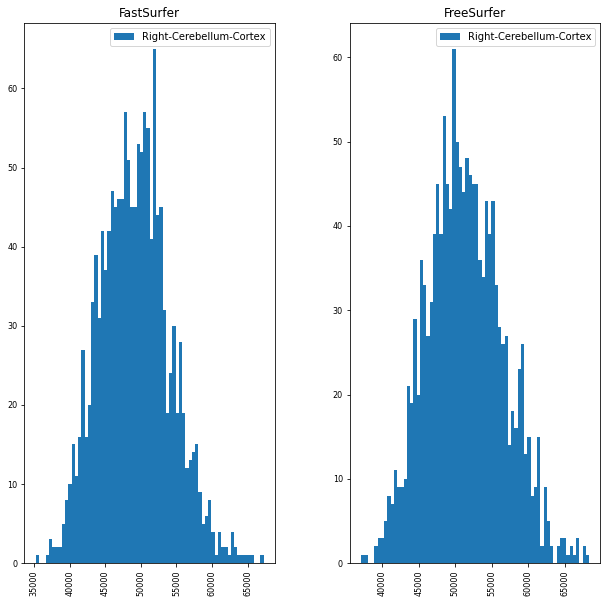

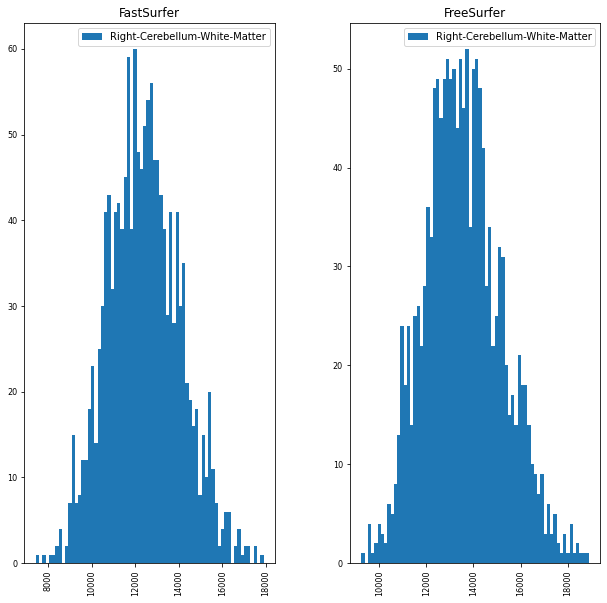

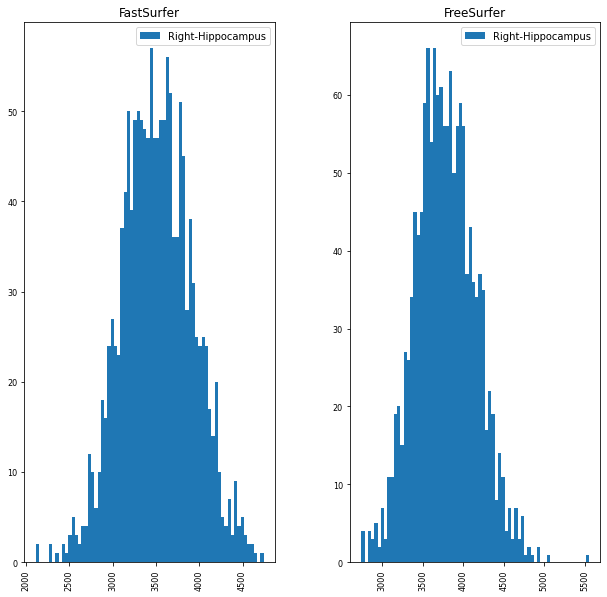

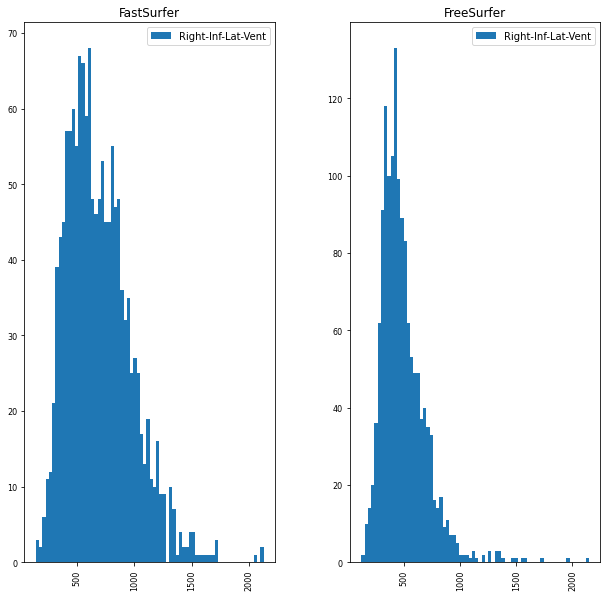

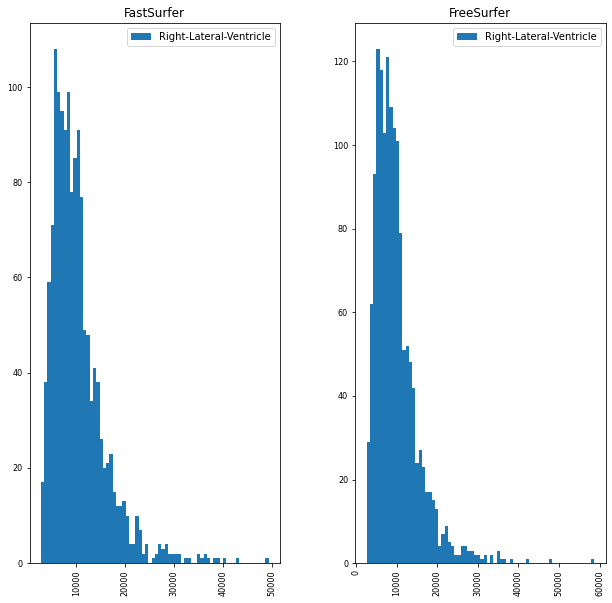

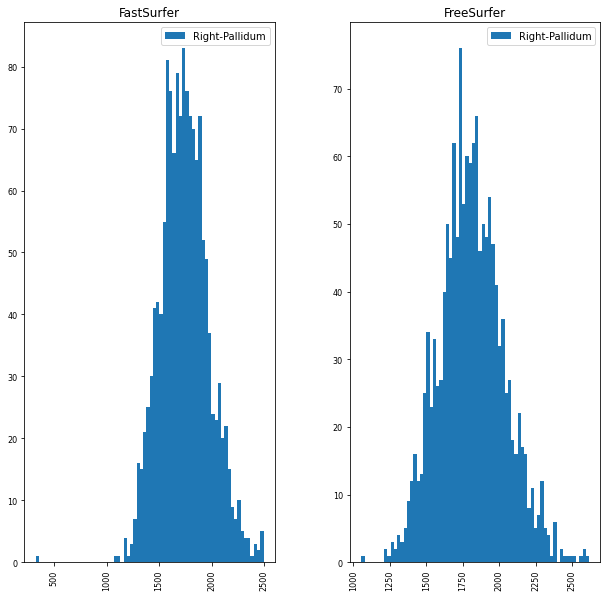

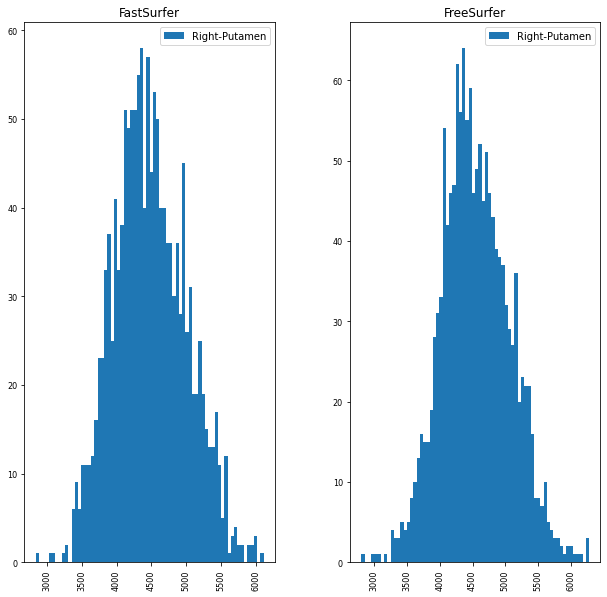

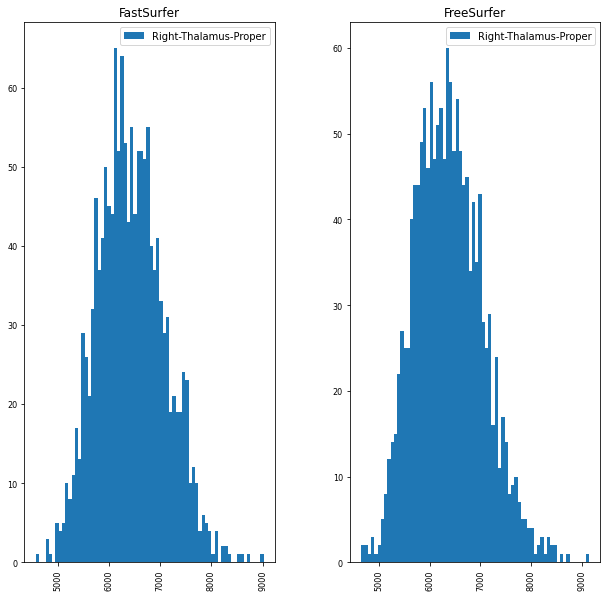

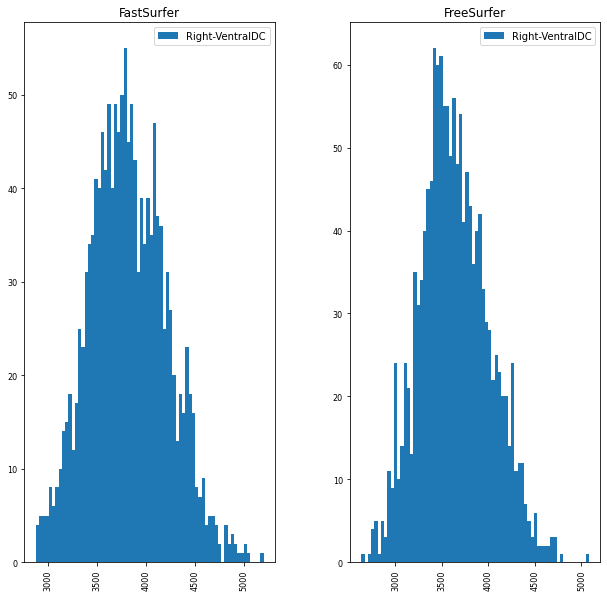

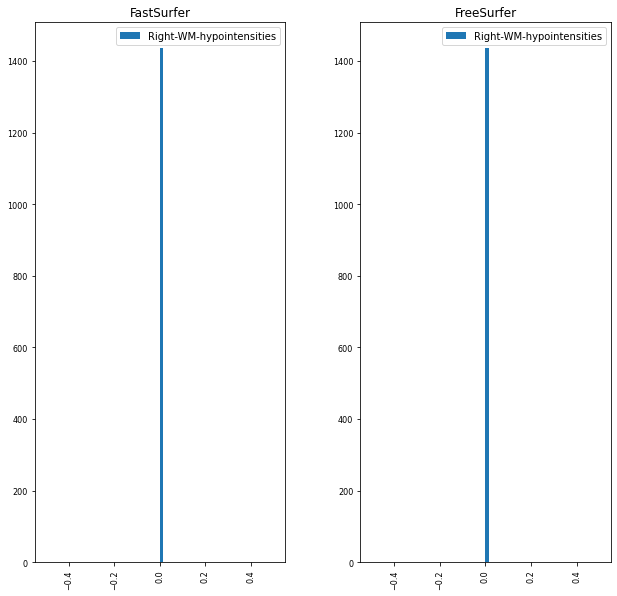

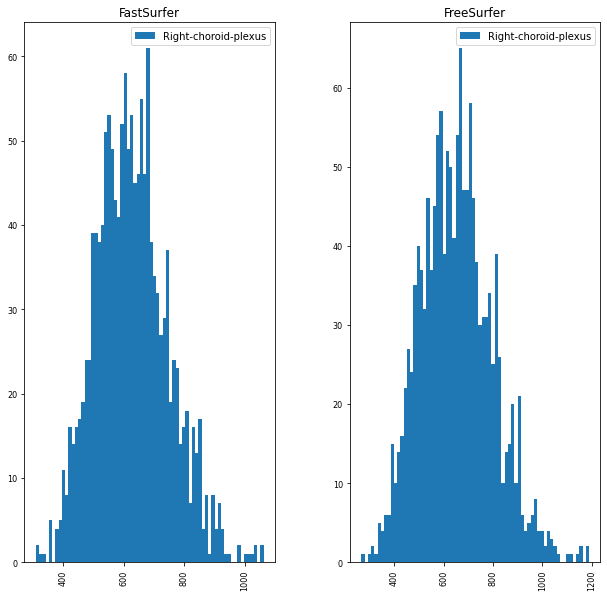

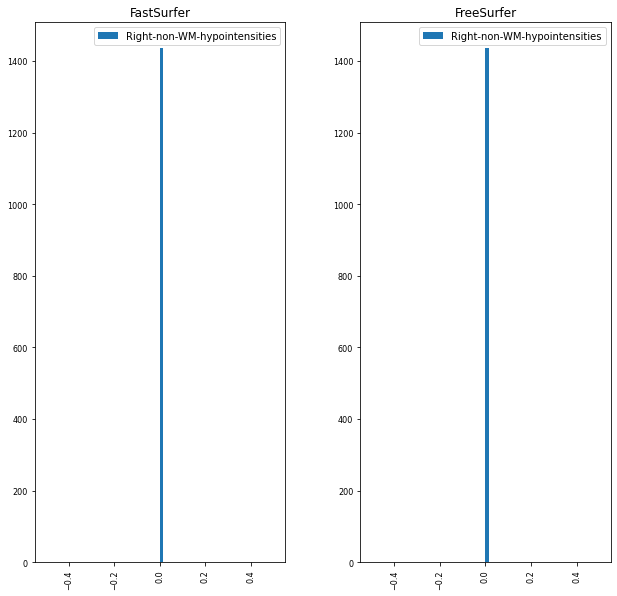

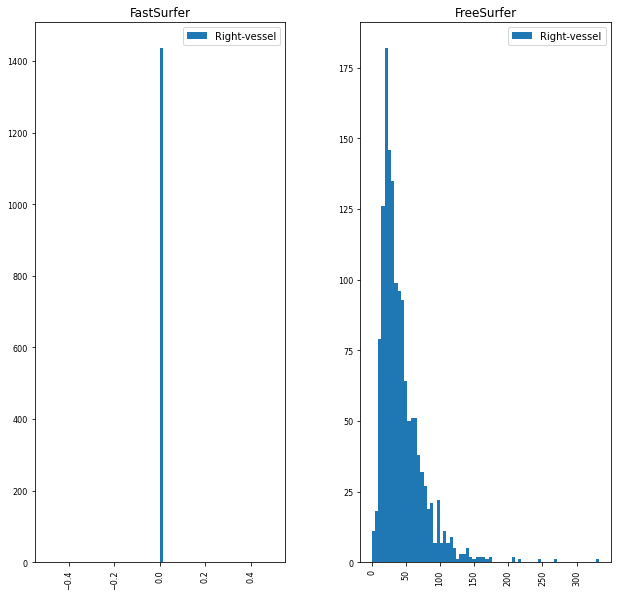

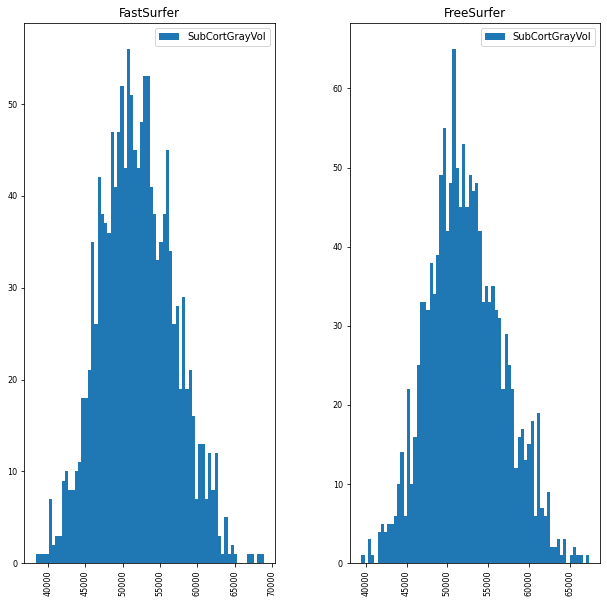

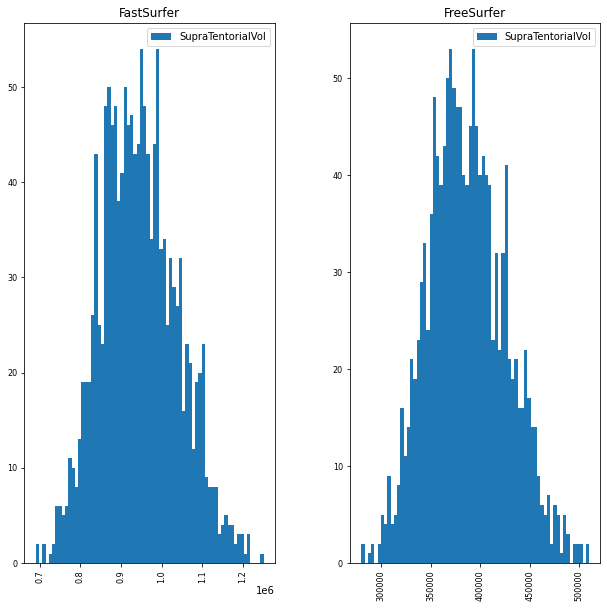

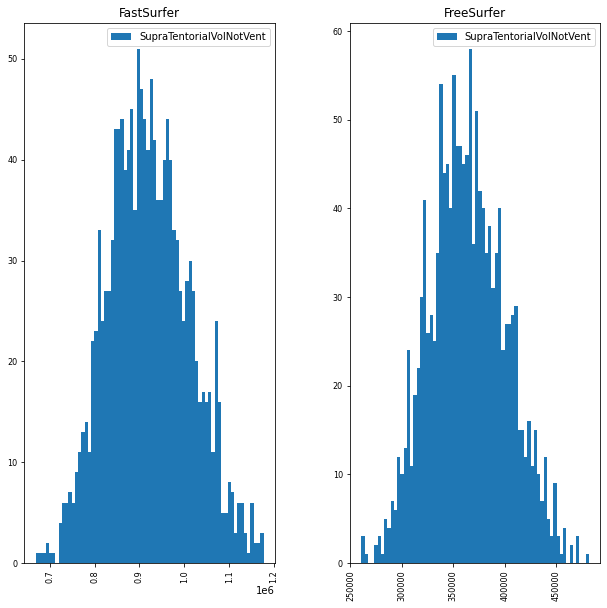

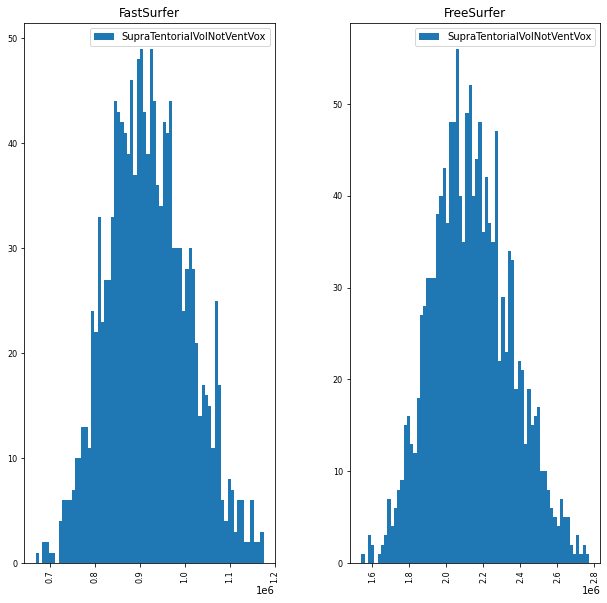

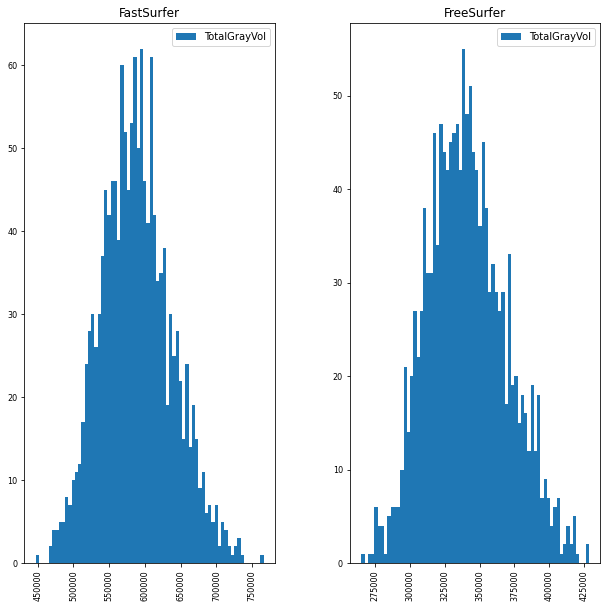

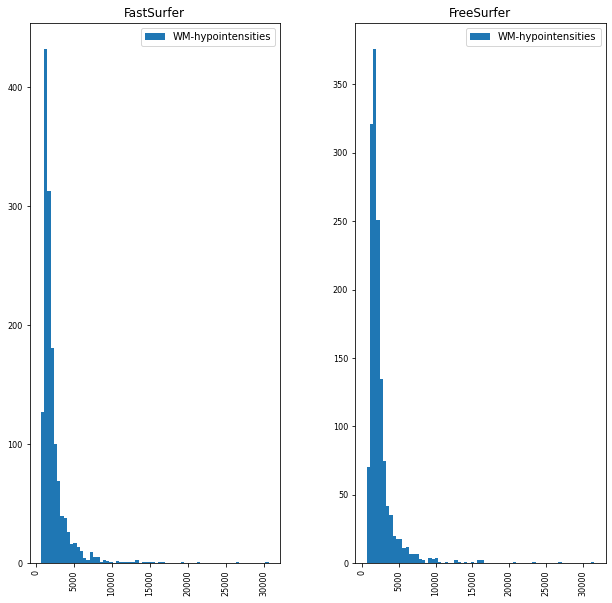

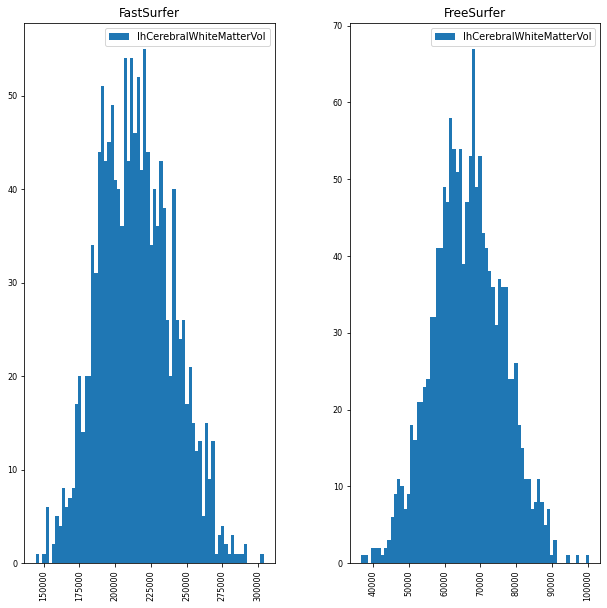

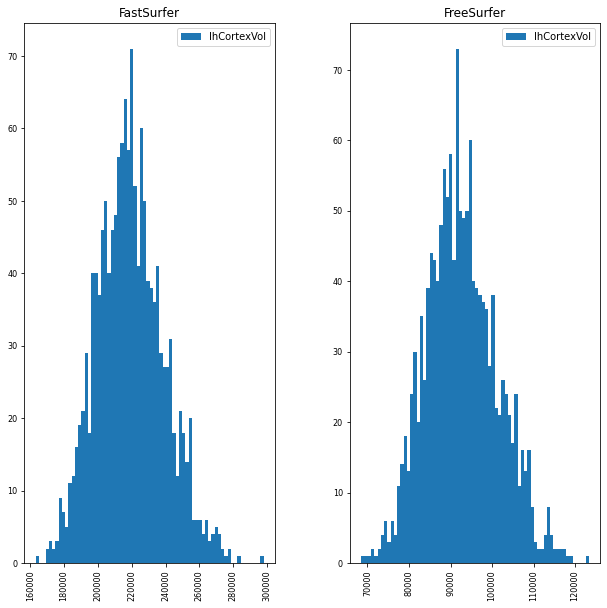

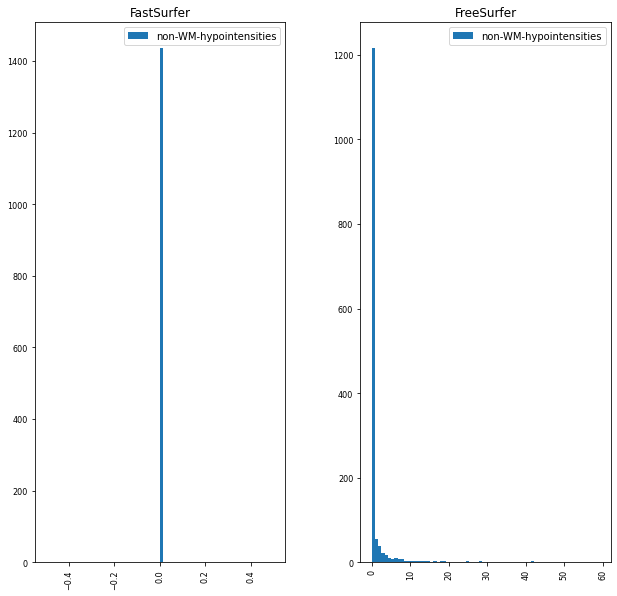

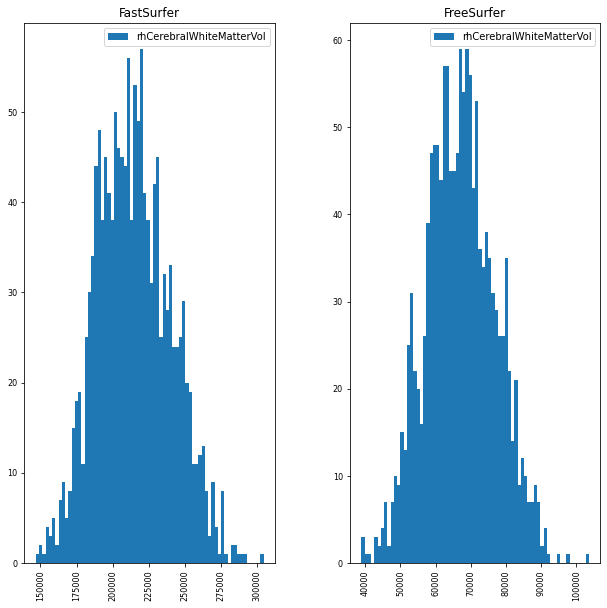

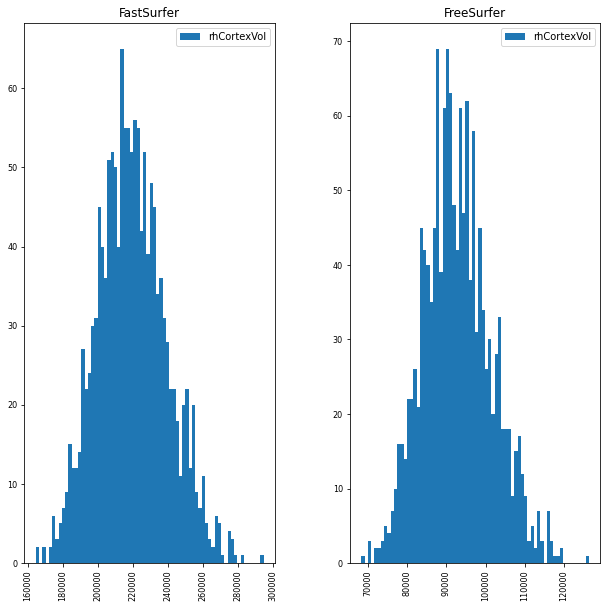

In [6]:
#Histograms

for i in range(len(concat_df.columns.tolist())):
    concat_df.hist(column=concat_df.columns[i],by='Software',figsize=(10,10), bins=70, xlabelsize=8, ylabelsize=8, legend=True)
    plt.show()

### Stats description grouped by Software

In [11]:
datasets_descriptions = concat_df.groupby('Software').describe()
datasets_descriptions

3rd-Ventricle                                                   \
                   count         mean         std    min     25%      50%   
Software                                                                    
FastSurfer        1436.0  1329.109192  471.575817  542.2  982.85  1235.55   
FreeSurfer        1436.0  1269.649721  491.065262  453.6  915.45  1163.95   

                             4th-Ventricle               ...  \
                 75%     max         count         mean  ...   
Software                                                 ...   
FastSurfer  1571.275  4341.0        1436.0  1904.978552  ...   
FreeSurfer  1512.350  4393.4        1436.0  1756.532521  ...   

           rhCerebralWhiteMatterVol                rhCortexVol                 \
                                75%            max       count           mean   
Software                                                                        
FastSurfer            231607.756397  304417.018195      1436.0  219691.038880   
FreeSurfer             73770.500836  103591.790771      1436.0   92854.378742   

                                                                       \
                     std            min            25%            50%   
Software                                                                
FastSurfer  19845.453668  164727.196708  206392.695216  218745.619096   
FreeSurfer   8636.973803   68374.658531   86985.152221   92234.102584   

                                          
                      75%            max  
Software                                  
FastSurfer  232327.766131  294506.516104  
FreeSurfer   98349.882748  126362.882725  

[2 rows x 472 columns]

In [12]:
#Resetting the index to call Software column easily

concat_df.reset_index(level='Software', inplace=True)

In [13]:
concat_df.head()

,Software,3rd-Ventricle,4th-Ventricle,5th-Ventricle,Brain-Stem,BrainSegVol,BrainSegVolNotVent,BrainSegVolNotVentSurf,CC_Anterior,CC_Central,...,SupraTentorialVol,SupraTentorialVolNotVent,SupraTentorialVolNotVentVox,TotalGrayVol,WM-hypointensities,lhCerebralWhiteMatterVol,lhCortexVol,non-WM-hypointensities,rhCerebralWhiteMatterVol,rhCortexVol
subject,,,,,,,,,,,,,,,,,,,,,
10010,FastSurfer,1252.3,1545.0,0.0,23478.7,1.130872e+06,1.103652e+06,1.103846e+06,1159.2,914.5,...,985329.127032,962081.127032,960743.0,606493.534351,2402.2,235160.339637,220400.716587,0.0,231447.253043,215464.817764
10010,FreeSurfer,1159.4,1573.8,0.0,23742.3,1.120108e+06,1.094086e+06,1.279596e+06,725.7,372.8,...,404450.375411,382244.984786,2241017.0,361617.995000,2252.6,74117.660344,94304.139146,0.0,72663.454442,92369.043355
10011,FastSurfer,1395.7,1464.9,0.0,20967.4,1.013429e+06,9.930320e+05,9.933133e+05,703.7,339.2,...,895651.319629,879223.319629,877813.0,579274.765061,1071.5,195681.058639,218365.416744,0.0,196481.495929,217480.348316
10011,FreeSurfer,1275.4,1295.1,0.0,19752.6,9.905536e+05,9.711305e+05,1.121663e+06,518.1,258.3,...,363215.767095,347508.095220,2018412.0,327493.800819,1176.0,59804.103309,91502.673933,0.0,61892.191092,89935.892511
10012,FastSurfer,1373.6,1385.9,0.0,21221.4,1.074364e+06,1.042517e+06,1.042115e+06,981.2,712.4,...,958722.844341,930585.844341,930082.0,584596.562471,1390.8,215145.144558,219214.854598,0.0,218237.137312,225925.707873


### Creation of functions to obtain mean difference and standard deviation

In [14]:
def dif_medias(atributo):
    
    dif_observada = (concat_df[atributo][concat_df.Software == 'FastSurfer'].mean()
                 - concat_df[atributo][concat_df.Software == 'FreeSurfer'].mean())
    if dif_observada > 0:
        mayor = '(bigger in FastSurfer)'
    elif dif_observada < 0:
        mayor = '(bigger in FreeSurfer)'
    else:
        mayor = ''
    print(f"Mean difference observed in {atributo}: {abs(dif_observada)} {mayor}")

def desv(atributo):
    desv_FastS = concat_df[atributo][concat_df.Software == 'FastSurfer'].std()
    desv_FreeS = concat_df[atributo][concat_df.Software == 'FreeSurfer'].std()

    print(f"Standard deviation observed in {atributo} in FastSurfer: {desv_FastS}")
    print(f"Standard deviation observed in {atributo} in FreeSurfer: {desv_FreeS}")

### Creation of function to obtain some distribution graphics

In [15]:
# Observed distribution graphics
# ==============================================================================

def graficos(atributo):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.5))
    sns.violinplot(
        x     = concat_df[atributo],
        y     = concat_df.Software,
        color = ".8",
        ax    = axs[0]
    )
    sns.stripplot(
        x    = concat_df[atributo],
        y    = concat_df.Software,
        data = concat_df,
        size = 4,
        jitter  = 0.1,
        palette = 'tab10',
        ax = axs[0]
    )
    axs[0].set_title('Value distributions by group')
    axs[0].set_ylabel('Software')
    axs[0].set_xlabel(atributo);

    for Software in concat_df.Software.unique():
        datos_temp = concat_df[concat_df.Software == Software][atributo]
        datos_temp.plot.kde(ax=axs[1], label=Software)
        axs[1].plot(datos_temp, np.full_like(datos_temp, 0), '|k', markeredgewidth=1)

    axs[1].set_title('Value distributions by group')
    axs[1].set_xlabel(atributo);
    axs[1].legend()

    fig.tight_layout();



### Calculating all mean differences and standard deviations

In [16]:
for i in concat_df.columns:
    if i == 'Software':
        continue
    else:
        dif_medias(i)
        desv(i)
        print('\n')
        

Mean difference observed in 3rd-Ventricle: 59.459470752089146 (bigger in FastSurfer)
Standard deviation observed in 3rd-Ventricle in FastSurfer: 471.5758165836377
Standard deviation observed in 3rd-Ventricle in FreeSurfer: 491.06526190456566


Mean difference observed in 4th-Ventricle: 148.4460306406686 (bigger in FastSurfer)
Standard deviation observed in 4th-Ventricle in FastSurfer: 466.1813345347092
Standard deviation observed in 4th-Ventricle in FreeSurfer: 485.62189577124303


Mean difference observed in 5th-Ventricle: 0.07110027855153203 (bigger in FreeSurfer)
Standard deviation observed in 5th-Ventricle in FastSurfer: 0.0
Standard deviation observed in 5th-Ventricle in FreeSurfer: 0.7463689858963435


Mean difference observed in Brain-Stem: 570.0629526462399 (bigger in FastSurfer)
Standard deviation observed in Brain-Stem in FastSurfer: 2170.9869405504724
Standard deviation observed in Brain-Stem in FreeSurfer: 2245.7255443270747


Mean difference observed in BrainSegVol: 10456.

<div class="alert alert-block alert-info">
Significant differences are observed in the following regions:

    -BrainSegVolNotVentSurf (bigger in FreeSurfer)
    -CC_Anterior (bigger in FastSurfer)
    -CC_Central (bigger in FastSurfer)
    -CC_Mid_Anterior (bigger in FastSurfer)
    -CC_Mid_Posterior (bigger in FastSurfer)
    -CC_Posterior (bigger in FastSurfer)
    -CerebralWhiteMatterVol (bigger in FastSurfer)
    -Left-Inf-Lat-Vent (bigger in FastSurfer)
    -MaskVol (bigger in FreeSurfer)
    -Right-Inf-Lat-Vent (bigger in FastSurfer)
    -SupraTentorialVol (bigger in FastSurfer)
    -SupraTentorialVolNotVent (bigger in FastSurfer)
    -SupraTentorialVolNotVentVox (bigger in FreeSurfer)
    -lhCerebralWhiteMatterVol (bigger in FastSurfer)
    -lhCortexVol (bigger in FastSurfer)
    -rhCerebralWhiteMatterVol (bigger in FastSurfer)
    -rhCortexVol (bigger in FastSurfer)

</div>

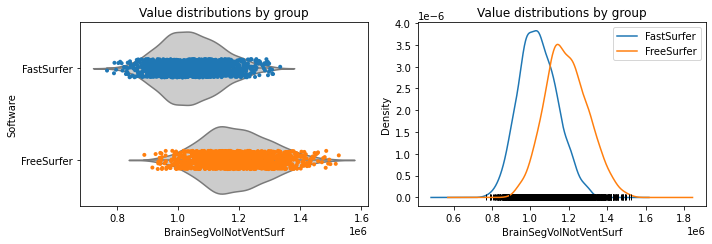

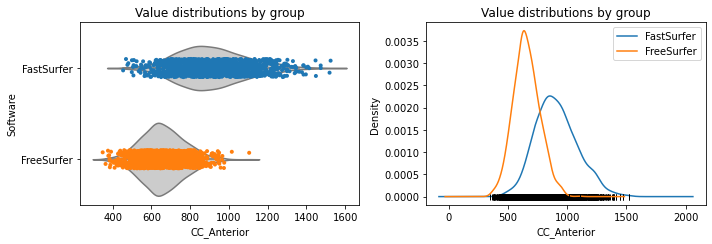

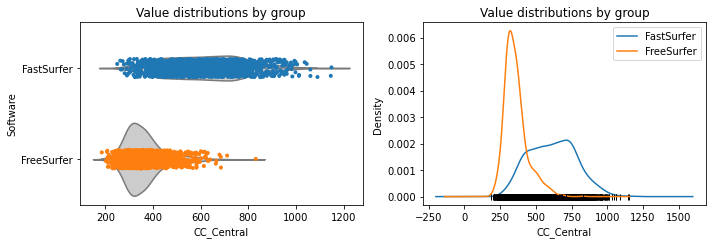

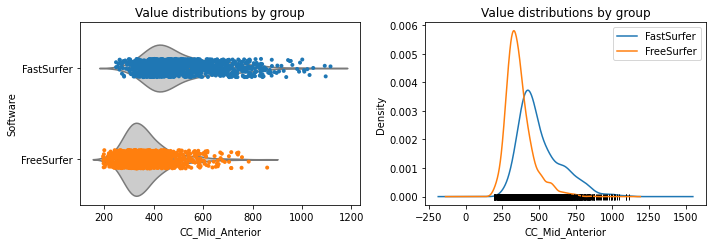

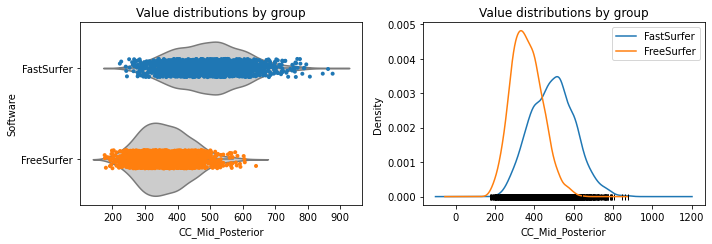

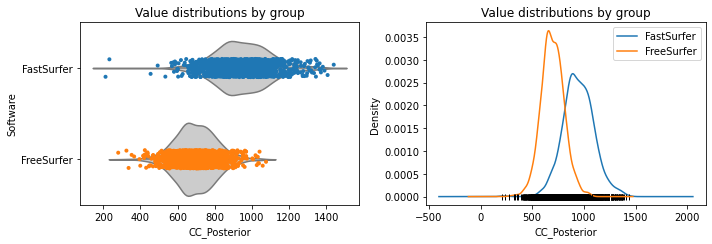

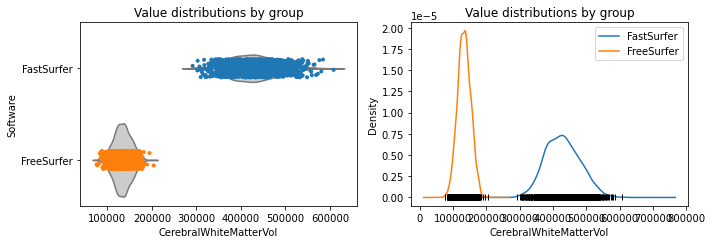

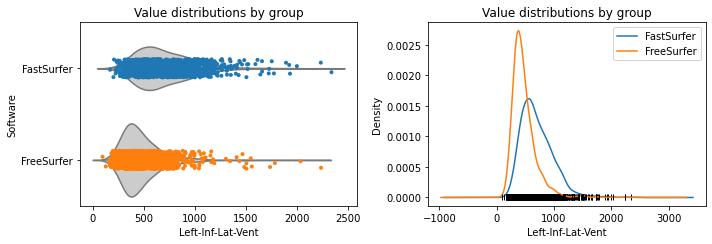

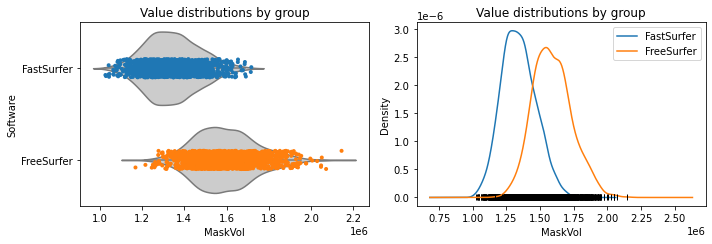

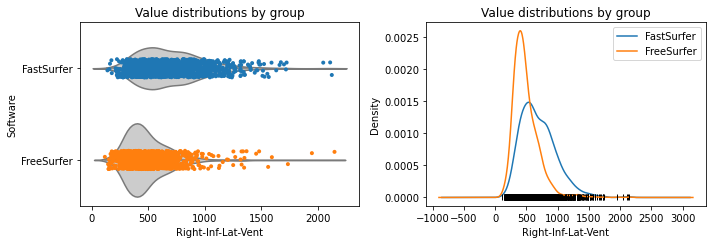

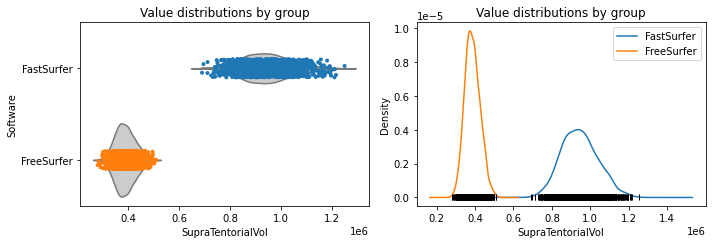

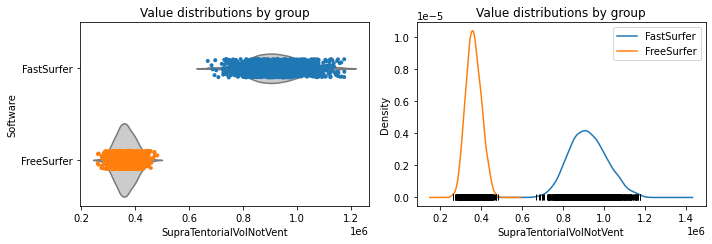

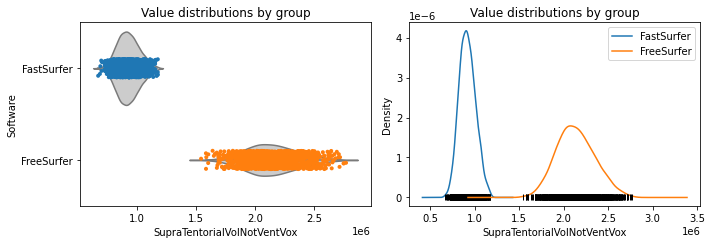

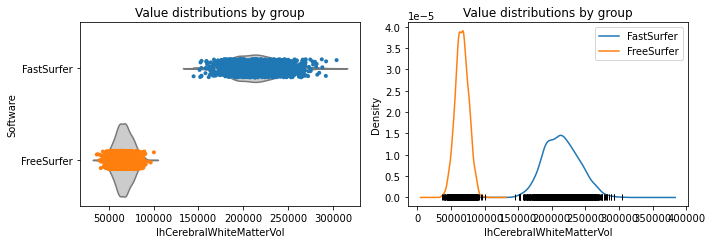

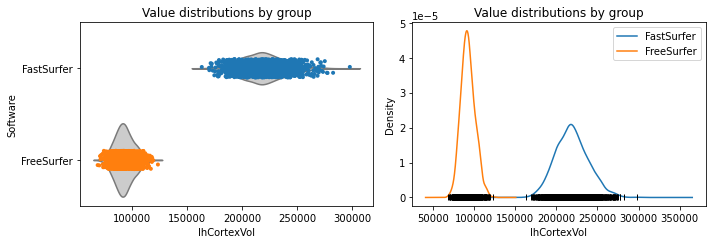

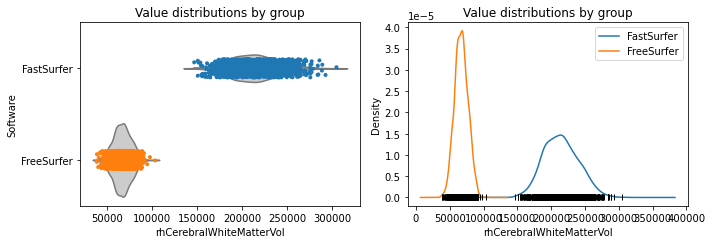

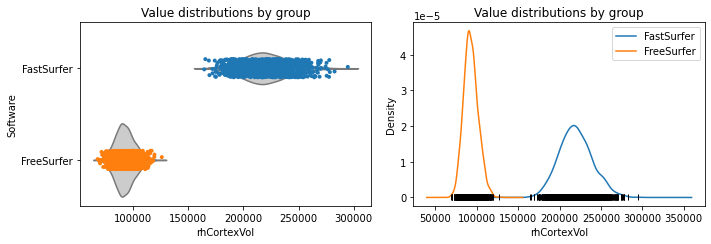

In [17]:
graficos('BrainSegVolNotVentSurf')
graficos('CC_Anterior')
graficos('CC_Central')
graficos('CC_Mid_Anterior')
graficos('CC_Mid_Posterior')
graficos('CC_Posterior')
graficos('CerebralWhiteMatterVol')
graficos('Left-Inf-Lat-Vent')
graficos('MaskVol')
graficos('Right-Inf-Lat-Vent')
graficos('SupraTentorialVol')
graficos('SupraTentorialVolNotVent')
graficos('SupraTentorialVolNotVentVox')
graficos('lhCerebralWhiteMatterVol')
graficos('lhCortexVol')
graficos('rhCerebralWhiteMatterVol')
graficos('rhCortexVol')

<div class="alert alert-block alert-info">
Furthermore, FastSurfer hasn't segmentated the following regions:
    
    -5th-Ventricle
    -Left-WM-hypointensities
    -Left-non-WM-hypointensities
    -Left-vessel
    -Optic-Chiasm
    -Right-WM-hypointensities (FreeSurfer didn't segmentate either)
    -Right-non-WM-hypointensities (FreeSurfer didn't segmentate either)
    -Right-vessel
    -non-WM-hypointensities
    
</div>